# Exploración de datos

In [1]:
import sys
import os
from functools import reduce

project_path = os.path.abspath('..')
sys.path.insert(1, project_path)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.utils import get_project_root
from src.data.make_dataset import get_minma_data

Para una exploración inicial de los datos, se utilizarán datos desde 5 años atrás de las siguientes variables presentes en ambas estaciones:
- SO2
- NO2
- NO
- NOX
- O3
- CO
- Dirección del viento
- Velocidad del viento

NORMA: ANUAL 80 microgramos /metrocubico
24H: 365 microgramos/metrocubico

In [5]:
params = ['SO2','NO2', 'NO', 'NOX', 'O3'] # NO HAY CO
from_last = '5y'

## ConCon

In [7]:
ventanas_df = get_minma_data(params, 'ventanas', from_last=from_last)
ventanas_df.head()

C:\Users\javie\AppData\Local\Temp/ipykernel_7368/367684621.py:1: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version
  ventanas_df = get_minma_data(params, 'ventanas', from_last=from_last)


Registros validados_SO2  Registros preliminares_SO2  \
2017-10-04 18:00:00                      NaN                         NaN   
2017-10-04 19:00:00                      NaN                         NaN   
2017-10-04 20:00:00                      NaN                         NaN   
2017-10-04 21:00:00                      NaN                         NaN   
2017-10-04 22:00:00                      NaN                         NaN   

                     Registros no validados_SO2  Registros validados_NO2  \
2017-10-04 18:00:00                        2.31                      NaN   
2017-10-04 19:00:00                        2.12                      NaN   
2017-10-04 20:00:00                        2.15                      NaN   
2017-10-04 21:00:00                        2.01                      NaN   
2017-10-04 22:00:00                        2.11                      NaN   

                     Registros preliminares_NO2  Registros no validados_NO2  \
2017-10-04 18:00:00                         NaN                        4.54   
2017-10-04 19:00:00                         NaN                        3.65   
2017-10-04 20:00:00                         NaN                        3.59   
2017-10-04 21:00:00                         NaN                        3.40   
2017-10-04 22:00:00                         NaN                        3.40   

                     Registros validados_NO  Registros preliminares_NO  \
2017-10-04 18:00:00                     NaN                        NaN   
2017-10-04 19:00:00                     NaN                        NaN   
2017-10-04 20:00:00                     NaN                        NaN   
2017-10-04 21:00:00                     NaN                        NaN   
2017-10-04 22:00:00                     NaN                        NaN   

                     Registros no validados_NO  Registros validados_NOX  \
2017-10-04 18:00:00                    2.05393                      NaN   
2017-10-04 19:00:00                    1.63730                      NaN   
2017-10-04 20:00:00                    1.64193                      NaN   
2017-10-04 21:00:00                    1.67473                      NaN   
2017-10-04 22:00:00                    1.62698                      NaN   

                     Registros preliminares_NOX  Registros no validados_NOX  \
2017-10-04 18:00:00                         NaN                     6.50358   
2017-10-04 19:00:00                         NaN                     5.28568   
2017-10-04 20:00:00                         NaN                     5.22860   
2017-10-04 21:00:00                         NaN                     5.07702   
2017-10-04 22:00:00                         NaN                     5.02203   

                     Registros validados_O3  Registros preliminares_O3  \
2017-10-04 18:00:00                     NaN                        NaN   
2017-10-04 19:00:00                     NaN                        NaN   
2017-10-04 20:00:00                     NaN                        NaN   
2017-10-04 21:00:00                     NaN                        NaN   
2017-10-04 22:00:00                     NaN                        NaN   

                     Registros no validados_O3  
2017-10-04 18:00:00                       15.0  
2017-10-04 19:00:00                       16.0  
2017-10-04 20:00:00                       17.0  
2017-10-04 21:00:00                       16.0  
2017-10-04 22:00:00                       16.0

In [8]:
ventanas_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43830 entries, 2017-10-04 18:00:00 to 2022-10-04 23:00:00
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Registros validados_SO2     0 non-null      float64
 1   Registros preliminares_SO2  0 non-null      float64
 2   Registros no validados_SO2  43310 non-null  float64
 3   Registros validados_NO2     0 non-null      float64
 4   Registros preliminares_NO2  0 non-null      float64
 5   Registros no validados_NO2  43221 non-null  float64
 6   Registros validados_NO      0 non-null      float64
 7   Registros preliminares_NO   0 non-null      float64
 8   Registros no validados_NO   43226 non-null  float64
 9   Registros validados_NOX     0 non-null      float64
 10  Registros preliminares_NOX  0 non-null      float64
 11  Registros no validados_NOX  43223 non-null  float64
 12  Registros validados_O3      0 non-null      float64
 

Se observa que de las columnas, las únicas que poseen datos son aquellas que tienen datos preliminares, por lo que el resto se descartará

In [9]:
cols_to_drop = list(ventanas_df.filter(regex='(?<!no validados)_.*')) 
ventanas_df = ventanas_df.drop(cols_to_drop, axis=1)

Valores nulos

In [10]:
ventanas_df.isna().sum()

Registros no validados_SO2    520
Registros no validados_NO2    609
Registros no validados_NO     604
Registros no validados_NOX    607
Registros no validados_O3     544
dtype: int64

Resumen estadístico

In [11]:
ventanas_df.describe()

Registros no validados_SO2  Registros no validados_NO2  \
count                43310.000000                43221.000000   
mean                     4.405123                    7.279157   
std                      6.253030                    4.398773   
min                      0.070000                    0.170000   
25%                      2.240000                    3.970000   
50%                      2.840000                    6.160000   
75%                      4.070000                    9.590000   
max                    199.110000                   45.030000   

       Registros no validados_NO  Registros no validados_NOX  \
count               43226.000000                43223.000000   
mean                    4.052840                   11.302148   
std                     6.140964                    9.081920   
min                     0.443233                    0.902985   
25%                     1.694608                    5.969825   
50%                     2.261500                    8.737320   
75%                     3.828350                   13.418000   
max                   251.305000                  274.893000   

       Registros no validados_O3  
count               43286.000000  
mean                   12.859146  
std                     5.580760  
min                     0.000000  
25%                     9.000000  
50%                    12.000000  
75%                    16.000000  
max                    43.000000

Histogramas

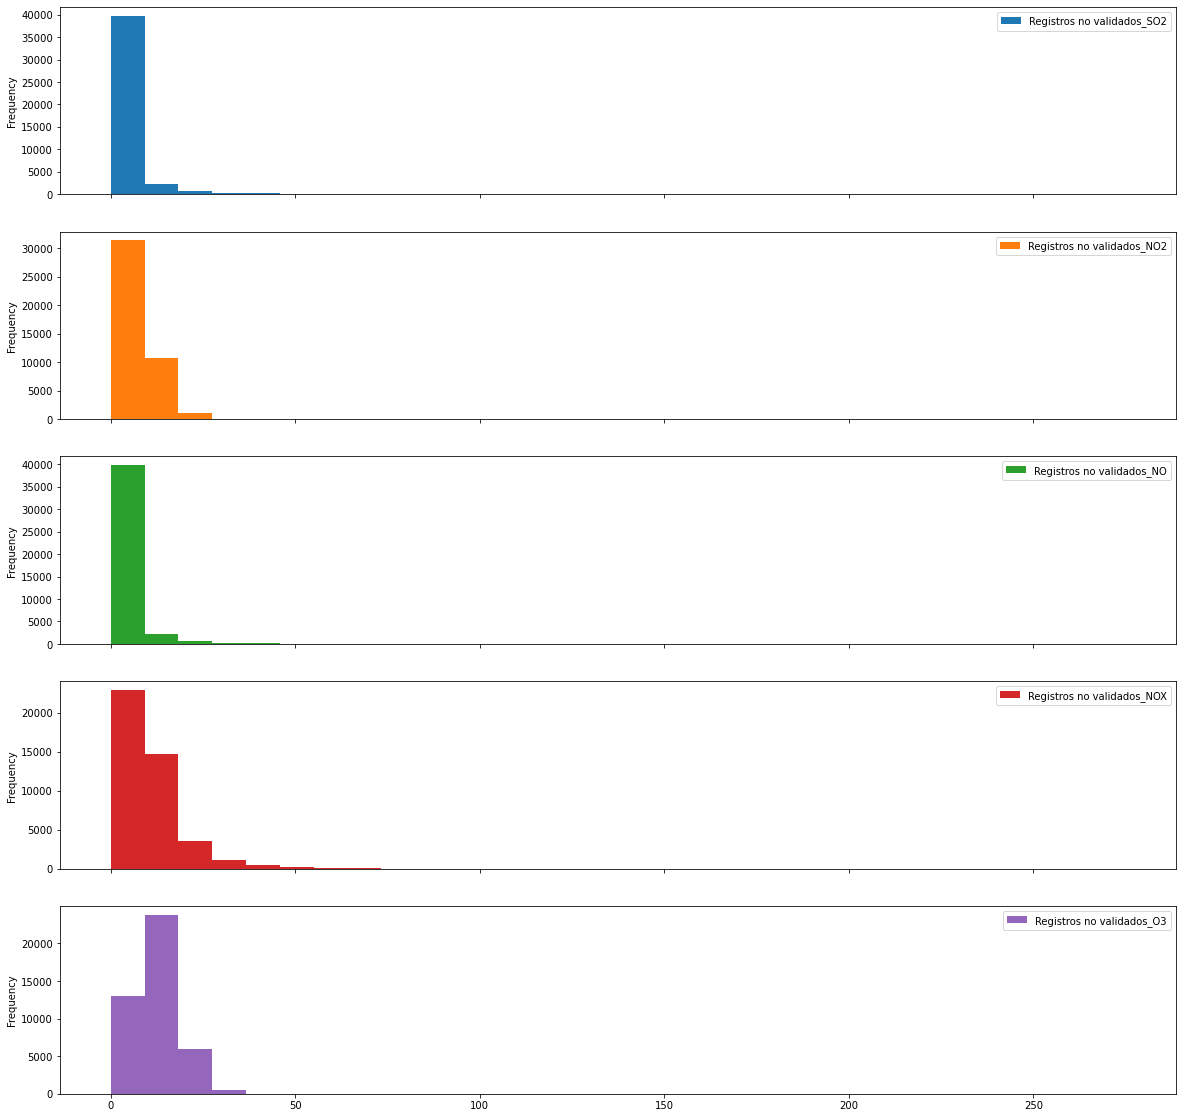

In [12]:
ventanas_df.plot.hist(subplots=True, figsize=(20,20), bins=30)
plt.show()

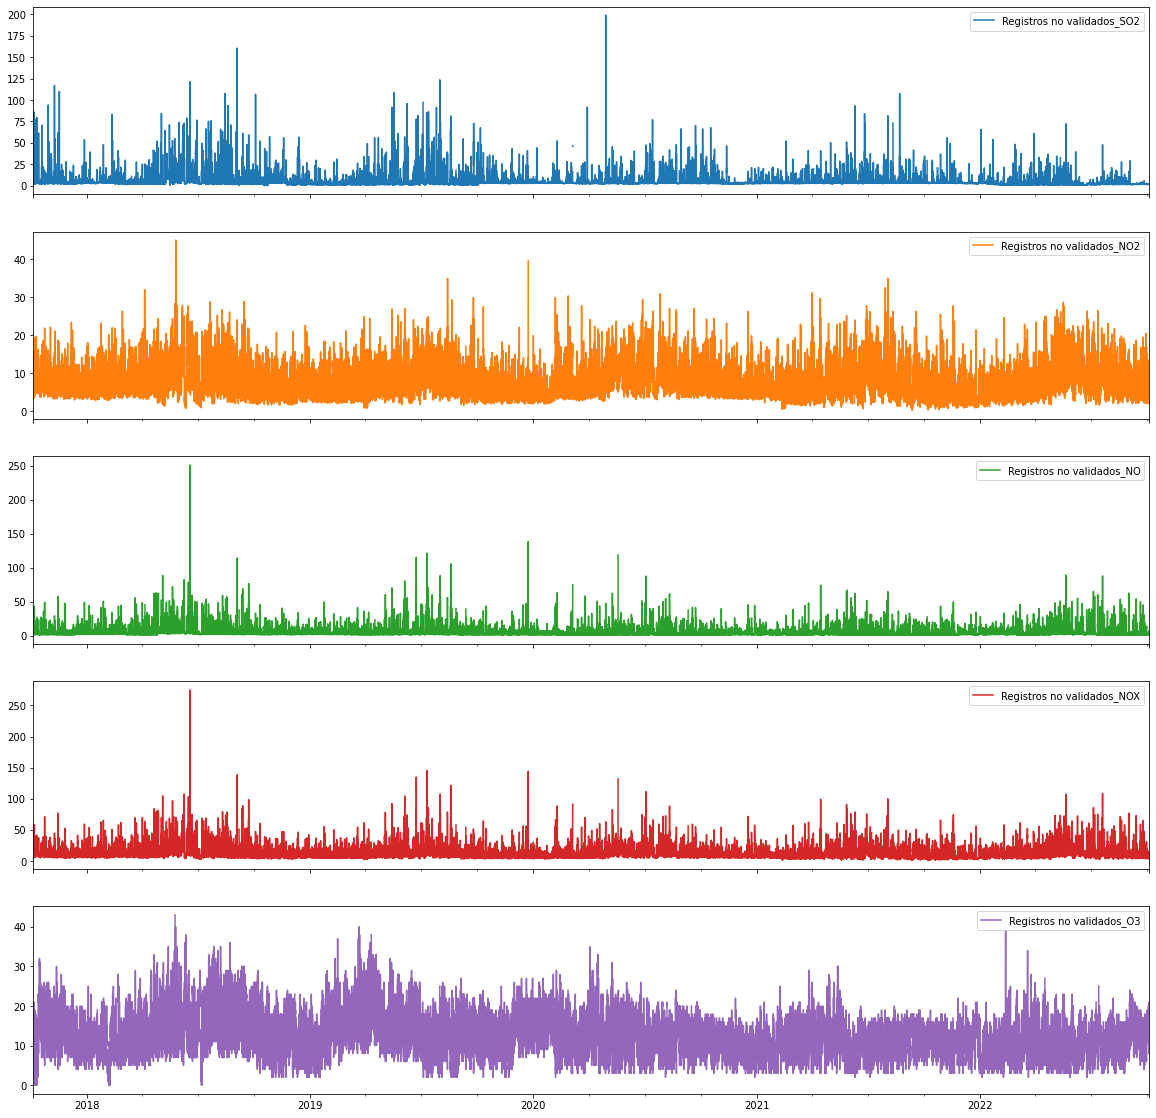

In [13]:
ventanas_df.plot(subplots=True, figsize=(20,20))
plt.show()

In [14]:
def ver_ultima_semana(df, dias_antes = 0):
    df_lw = df.iloc[(-24*dias_antes-168 -1):(-24*dias_antes-1)].interpolate()
    df_lw.plot(subplots=True, figsize=(20,20))
    plt.show()
    return df_lw
    
def ver_ultimo_ano(df, anos = 1, meses_antes = 0):
    df_lw = df.iloc[(-24*30*meses_antes-24*365*anos -1):(-24*30*meses_antes-1)].interpolate()
    df_lw.plot(subplots=True, figsize=(20,20))
    plt.show()
    return df_lw

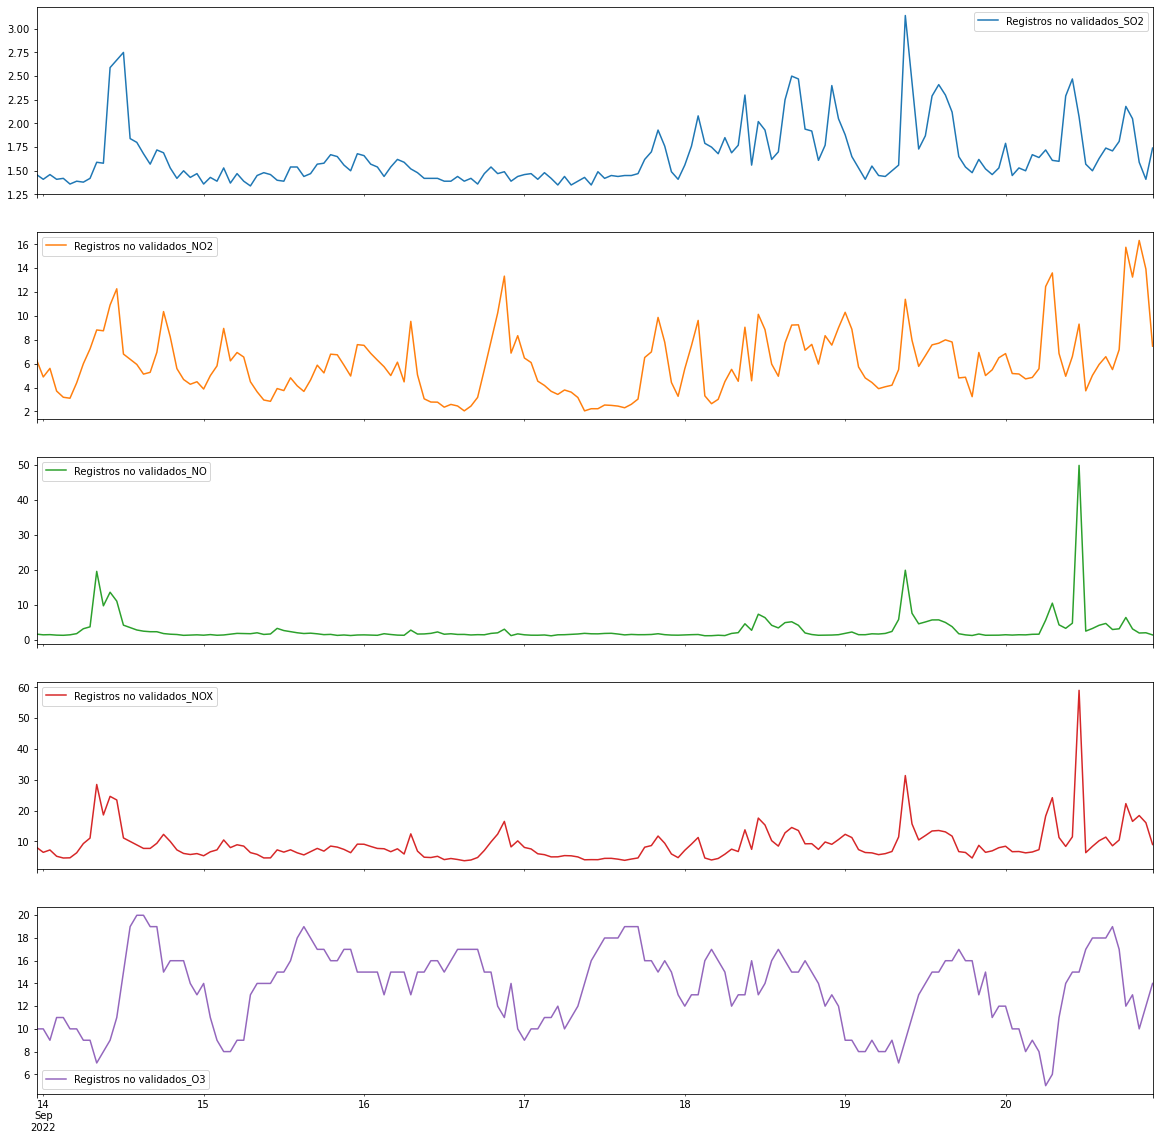

Registros no validados_SO2  Registros no validados_NO2  \
2022-09-13 23:00:00                        1.46                        6.33   
2022-09-14 00:00:00                        1.41                        4.89   
2022-09-14 01:00:00                        1.46                        5.61   
2022-09-14 02:00:00                        1.41                        3.71   
2022-09-14 03:00:00                        1.42                        3.19   
...                                         ...                         ...   
2022-09-20 18:00:00                        2.18                       15.76   
2022-09-20 19:00:00                        2.05                       13.26   
2022-09-20 20:00:00                        1.59                       16.33   
2022-09-20 21:00:00                        1.41                       13.93   
2022-09-20 22:00:00                        1.74                        7.47   

                     Registros no validados_NO  Registros no validados_NOX  \
2022-09-13 23:00:00                    1.72120                     8.04961   
2022-09-14 00:00:00                    1.52632                     6.41637   
2022-09-14 01:00:00                    1.57620                     7.19081   
2022-09-14 02:00:00                    1.43648                     5.14634   
2022-09-14 03:00:00                    1.39085                     4.57630   
...                                        ...                         ...   
2022-09-20 18:00:00                    6.47998                    22.24480   
2022-09-20 19:00:00                    3.20967                    16.47120   
2022-09-20 20:00:00                    2.04353                    18.37600   
2022-09-20 21:00:00                    2.10950                    16.03770   
2022-09-20 22:00:00                    1.49797                     8.96736   

                     Registros no validados_O3  
2022-09-13 23:00:00                       10.0  
2022-09-14 00:00:00                       10.0  
2022-09-14 01:00:00                        9.0  
2022-09-14 02:00:00                       11.0  
2022-09-14 03:00:00                       11.0  
...                                        ...  
2022-09-20 18:00:00                       12.0  
2022-09-20 19:00:00                       13.0  
2022-09-20 20:00:00                       10.0  
2022-09-20 21:00:00                       12.0  
2022-09-20 22:00:00                       14.0  

[168 rows x 5 columns]

In [15]:
ver_ultima_semana(ventanas_df, dias_antes = 14)

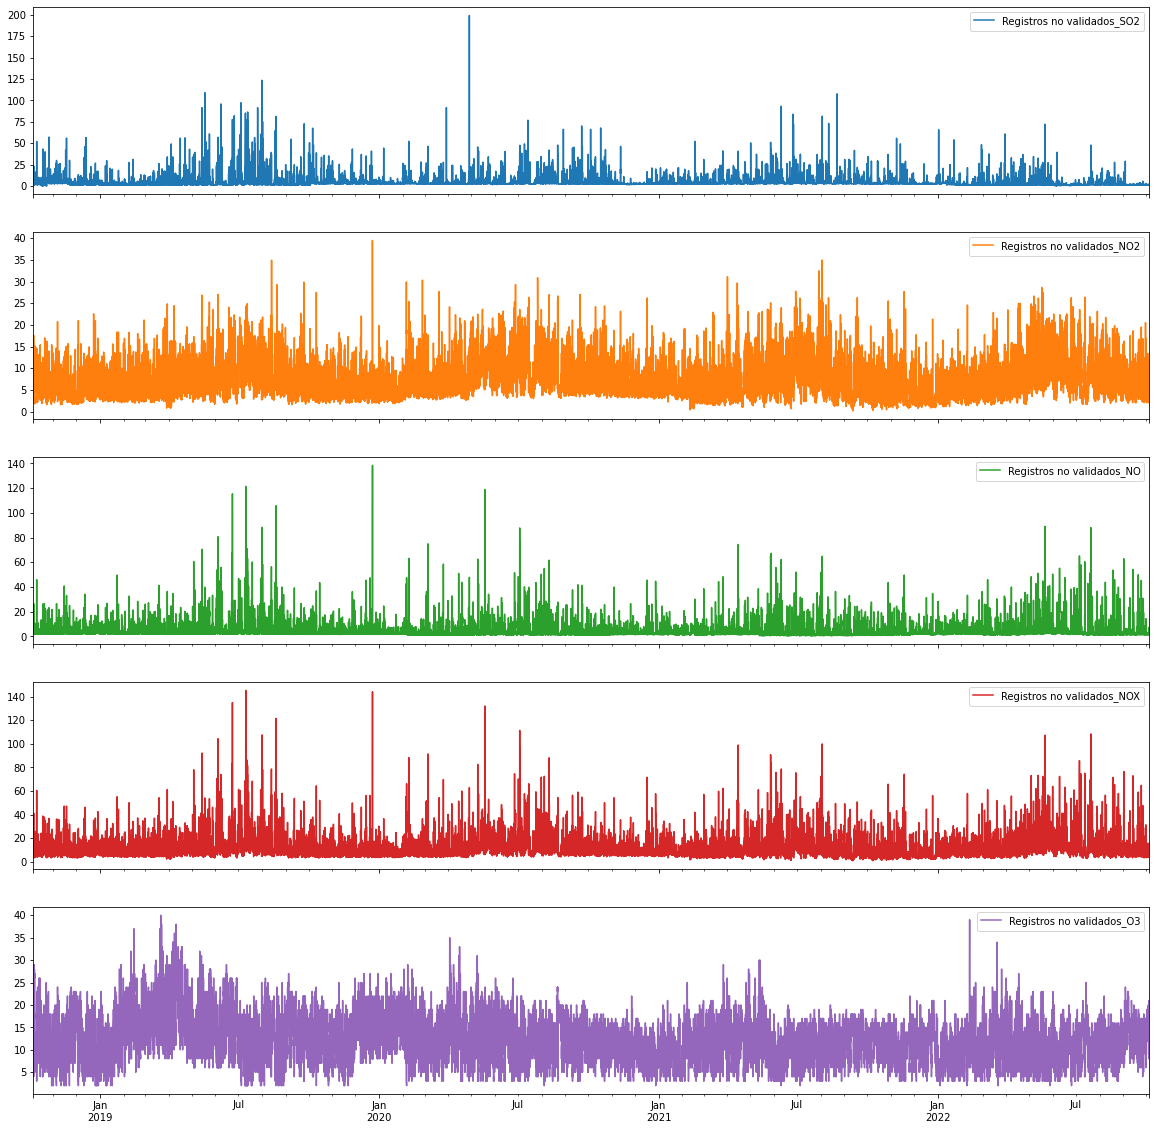

In [16]:
df_2anos = ver_ultimo_ano(ventanas_df, anos = 4)

In [17]:
#df_2anos = ver_ultimo_ano(concon_df, anos = 2)
#df_2anos["day"] = df_2anos.index.day
#df_2anos["month"] = df_2anos.index.month
#df_2anos.groupby(["day", "month"]).mean()

Visualización basada en:
https://github.com/KishManani/MSTL/blob/main/mstl_decomposition.ipynb

In [18]:
import seaborn as sns
from scipy.stats import circmean

In [42]:
def plot_por_mes(timeseries, col, log = False, circular = False):
    # Plot the electricity demand for each day
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=[15, 10], sharey=True)
    ax = ax.flatten()
    sns_blue = sns.color_palette(as_cmap=True)[0]
    MONTHS = ["Jan", "Feb", "Mar", "Apr", "May", "Jun"]
    for ix, month in enumerate(MONTHS):

        # Plot individual ts
        daily_ts = []
        for _, ts in (
            timeseries[[col, "day_of_month", "month"]]
            .query(f"month == {ix+1}")
            .groupby("day_of_month")
        ):
            daily_ts.append(ts.reset_index()[col])
            ts.reset_index()[col].plot(
                alpha=0.1, ax=ax[ix], color=sns_blue, label="_no_legend_"
            )
            ax[ix].set_xticks(np.arange(0, len(ts) + 1, 8))
            ax[ix].set_title(month)

        # Plot the mean ts
        if not circular:
            pd.concat(daily_ts, axis=1).mean(axis=1).plot(
                ax=ax[ix], color="blue", label="mean", legend=True
            )
        else:
            pd.concat(daily_ts, axis=1).apply(lambda x: circmean(x),axis=1).plot(
                ax=ax[ix], color="blue", label="mean", legend=True
            )
        ax[ix].legend(loc="upper left", frameon=False)
        if log:
            ax[ix].set_yscale('log')

        if month in ("Jan", "Feb"):
            ax[ix].tick_params(
                axis="x", which="both", bottom=False, top=False, labelbottom=False
            )

    fig.text(0.5, -0.02, "Hora del día", ha="center")
    fig.text(-0.02, 0.5, "Concentración", va="center", rotation="vertical")
    fig.suptitle("Emisiones de {} medidas cada día según el mes, en la estación Ventanas".format(col))
    #fig.delaxes(ax[-1])
    fig.tight_layout()
    plt.show()

def plot_por_semana(timeseries, col, log = False, circular = False):
    fig, ax = plt.subplots(figsize=[20, 10])
    weekly_ts = []
    sns_blue = sns.color_palette(as_cmap=True)
    DAYS = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
    for week, ts in timeseries.groupby("week"):
        weekly_ts.append(ts.reset_index()[col])
        ts.reset_index()[col].plot(alpha=0.1, ax=ax, label="_no_legend_", color=sns_blue)
        plt.xticks(ticks=np.arange(0, 167, 24), labels=DAYS)

    pd.concat(weekly_ts, axis=1).mean(axis=1).plot(
        ax=ax, color="blue", label="mean", legend=True
    )

    ax.set_ylabel("Concentración")
    ax.set_title("Emisiones de {} medidas cada día de la semana en la estación Ventanas".format(col))
    ax.set_xlabel("Día de la semana")
    if log:
            ax.set_yscale('log')
    ax.legend(loc="upper right", frameon=False)

    plt.tight_layout()
    plt.show()
    
def plot_por_ano(timeseries, col, circular = False):
    fig, ax = plt.subplots(figsize=[20, 10])
    yearly_ts = []
    sns_blue = sns.color_palette(as_cmap=True)
    MONTHS = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    for month, ts in timeseries.groupby("year"):
        ts = ts.groupby(["month","day_of_month"]).mean()
        #print(ts.reset_index())
        yearly_ts.append(ts.reset_index()[col])
        ts.reset_index()[col].plot(alpha=0.1, ax=ax, label="_no_legend_", color=sns_blue)
        plt.xticks(ticks= [0, 31, 59, 90, 120, 151, 181, 212, 242, 273, 303, 334], labels=MONTHS)

    pd.concat(yearly_ts, axis=1).mean(axis=1).plot(
        ax=ax, color="blue", label="mean", legend=True
    )

    ax.set_ylabel("Concentración")
    ax.set_title("Emisiones de {} medidas cada mes en la estación Ventanas".format(col))
    ax.set_xlabel("Mes")
    ax.legend(loc="upper right", frameon=False)

    plt.tight_layout()
    plt.show()
    
def visualizar_trends(df, col = "SO2", ano_0 = 2021, log = False, circular = False):
    timeseries = df
    timeseries['Fecha'] = timeseries.index
    timeseries = timeseries.rename(columns={"Registros no validados_SO2": "SO2", "Registros no validados_NO2": "NO2", "Registros no validados_NO": "NO", "Registros no validados_NOX": "NOX", "Registros no validados_O3": "O3", "Registros no validados_CO": "CO"})
    
    # Filter for first 149 days of 2021.
    start_date = pd.to_datetime("{}-01-01".format(ano_0))
    end_date = start_date + pd.Timedelta("180D")
    mask = (timeseries["Fecha"] >= start_date) & (timeseries["Fecha"] < end_date)
    #mask = (timeseries.index >= start_date) & (timeseries.index < end_date)
    #timeseries_full = timeseries
    
    # Resample to hourly
    
    # Compute date time variables used later in plotting
    timeseries["week"] = timeseries.index.isocalendar().week
    timeseries["day_of_month"] = timeseries.index.day
    timeseries["month"] = timeseries.index.month
    timeseries["year"] = timeseries.index.year
    timeseries_full = timeseries
    timeseries = timeseries[mask]
    timeseries = timeseries.set_index("Fecha").resample("H").sum()
    plot_por_mes(timeseries, col, log = log, circular = circular)
    plot_por_semana(timeseries, col, log = log, circular = circular)
    plot_por_ano(timeseries_full, col, circular =  circular)
    
    

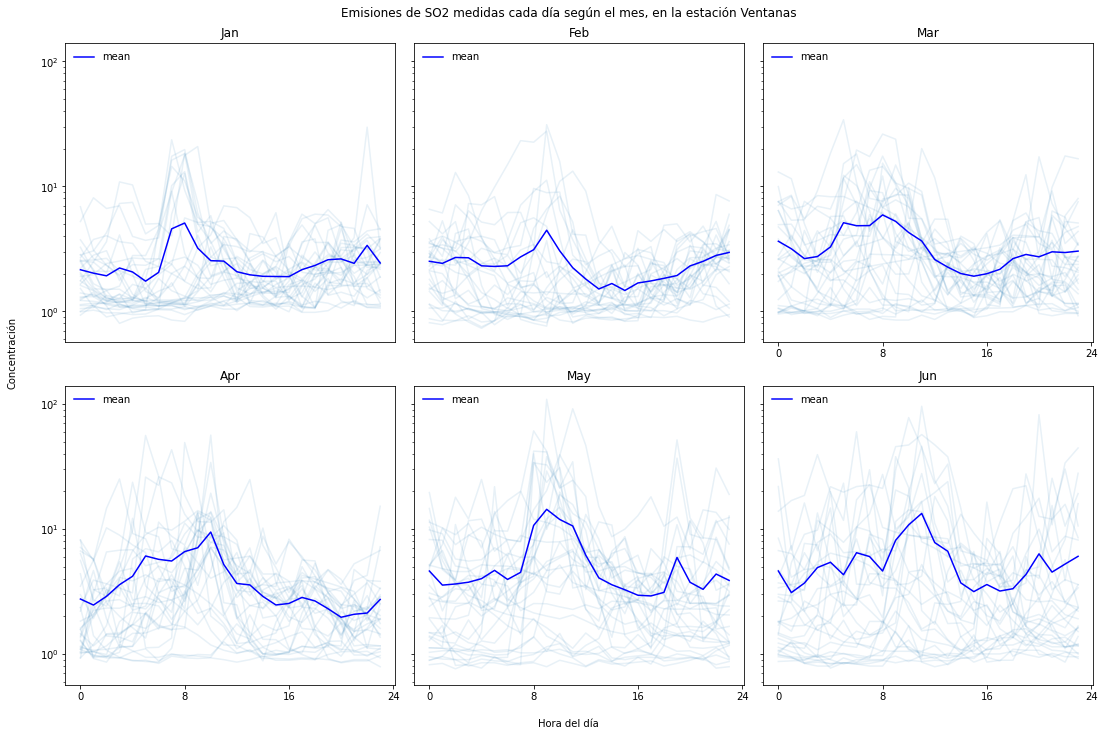

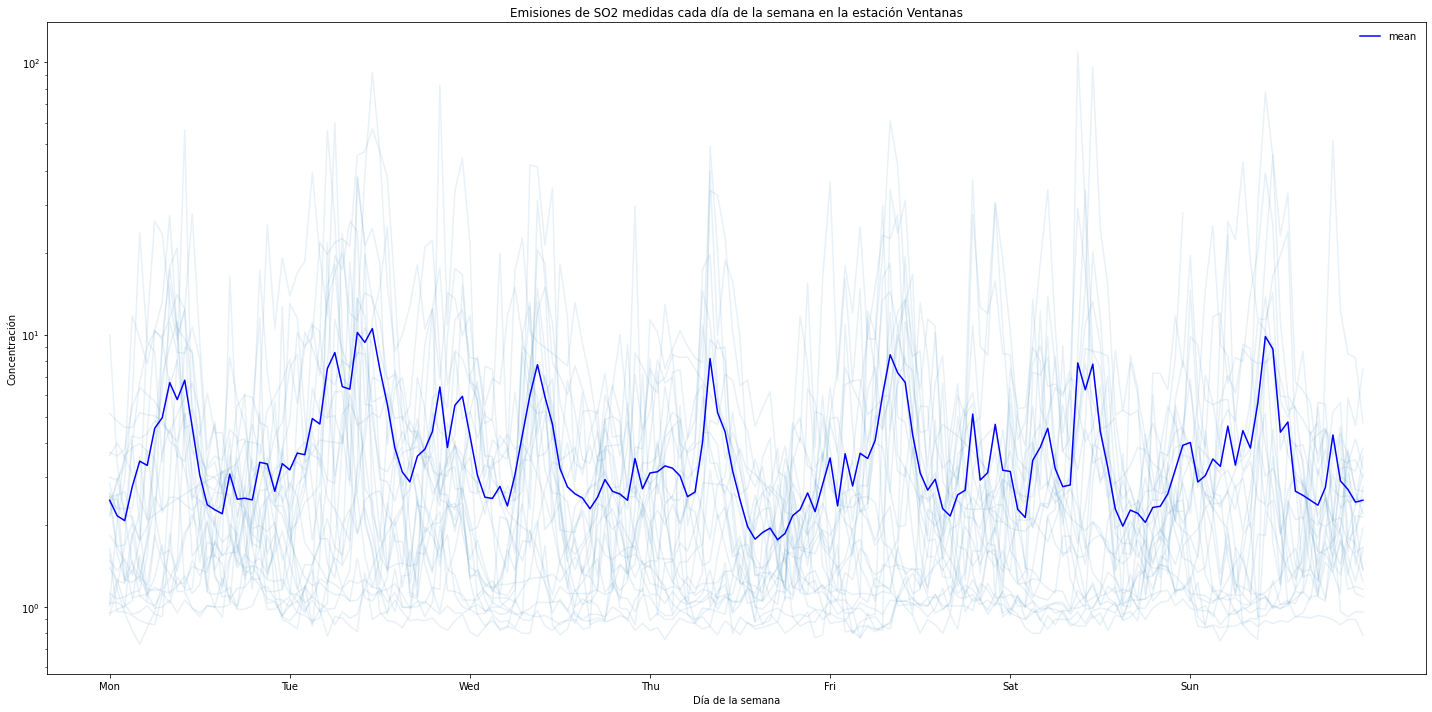

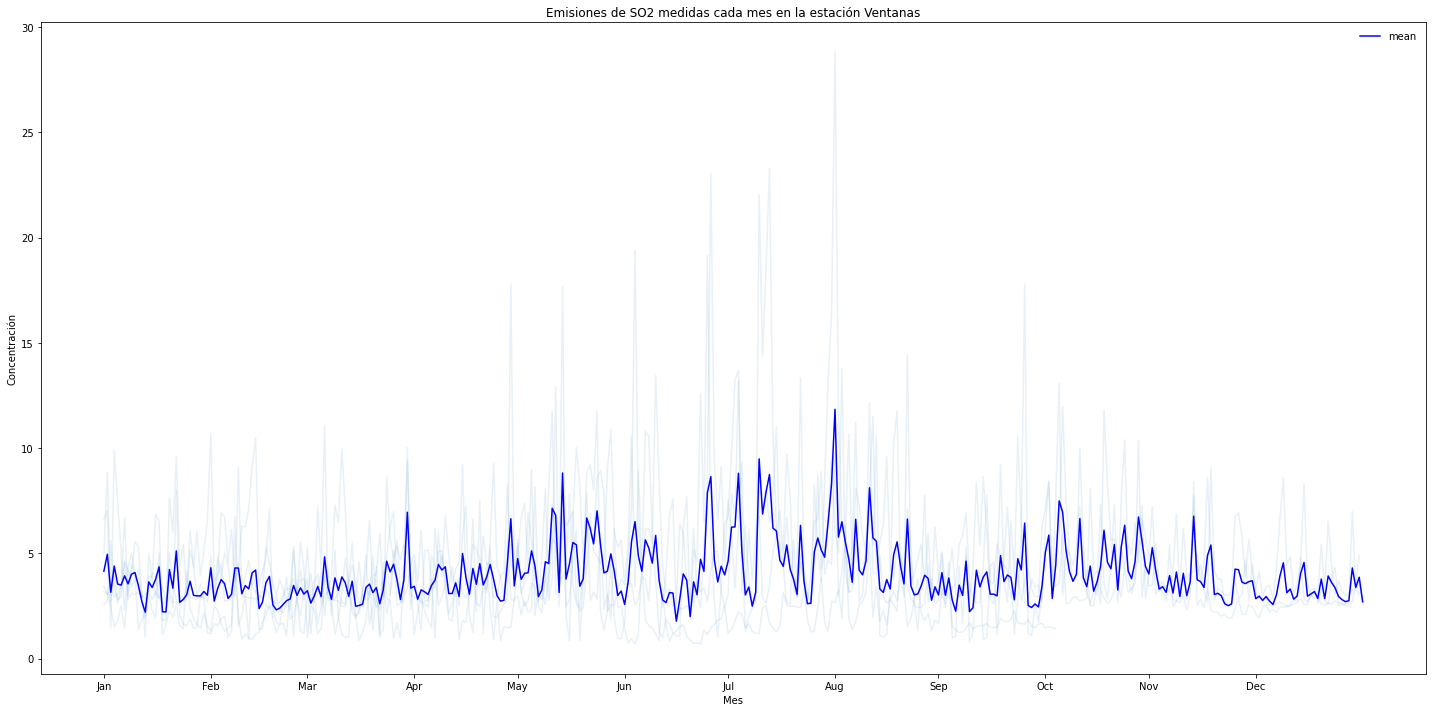

In [43]:
visualizar_trends(df_2anos, col = "SO2", ano_0=2019, log=True)

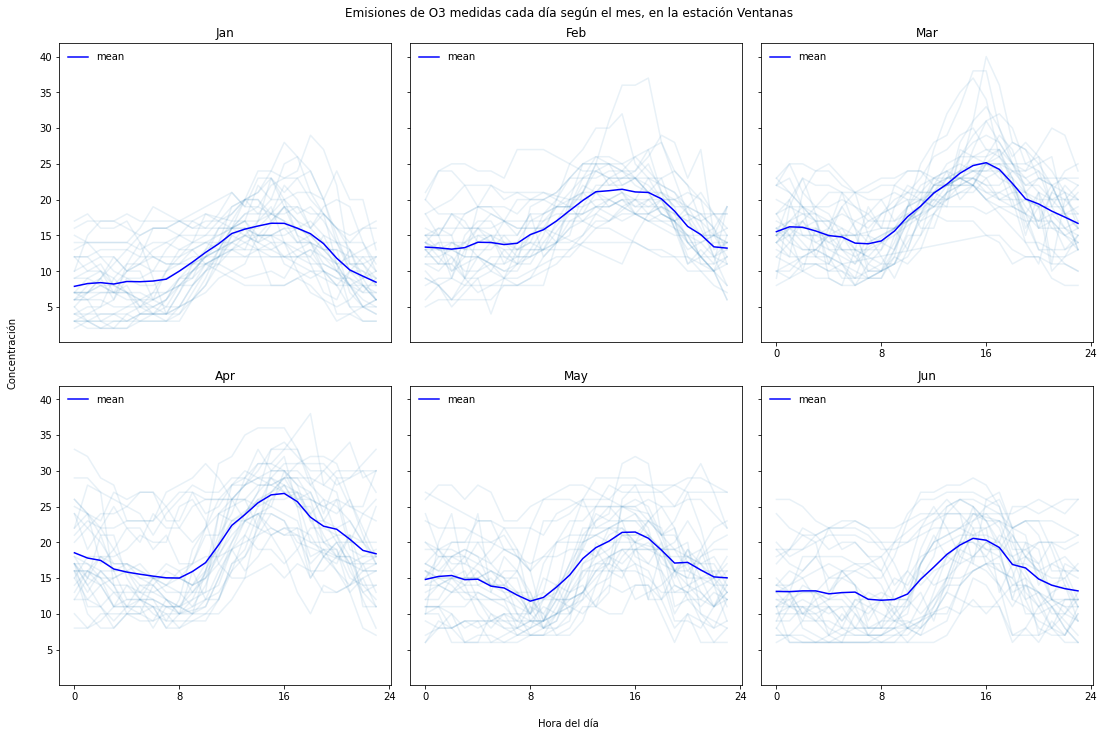

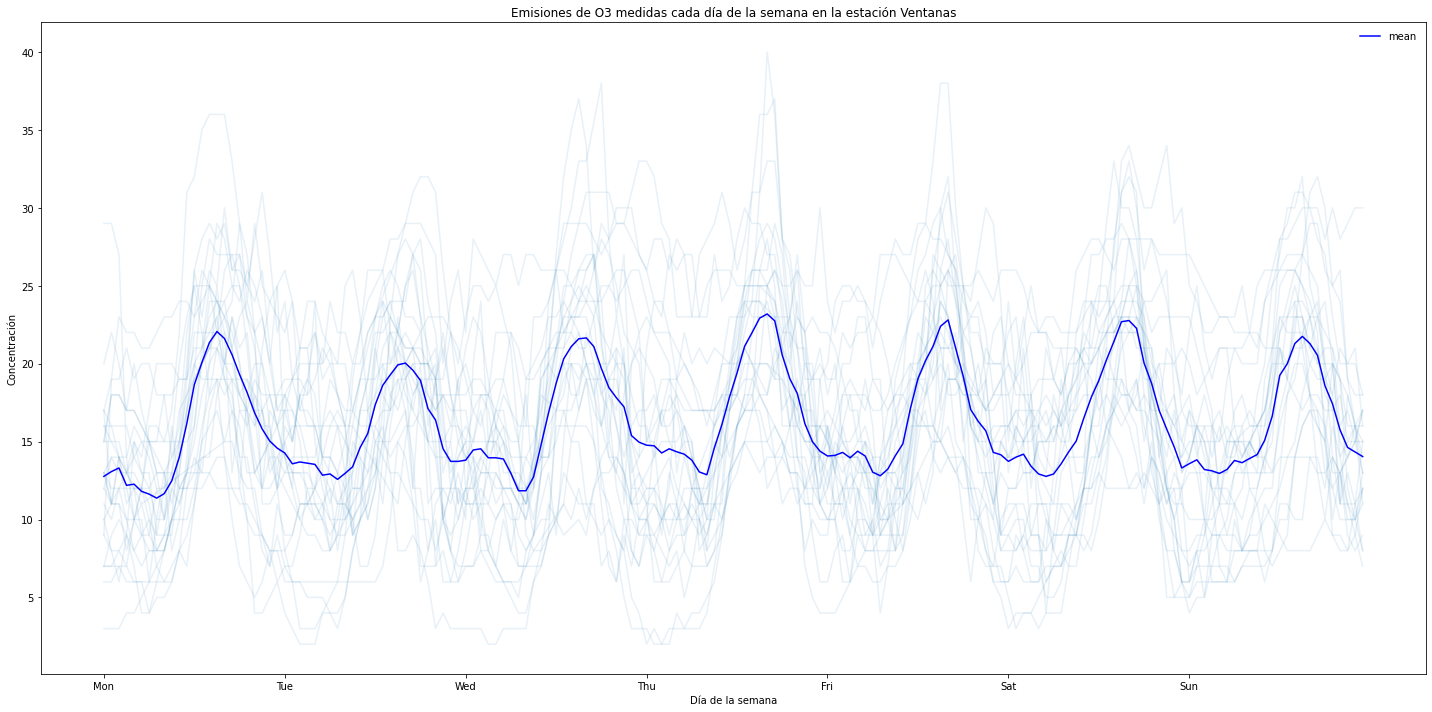

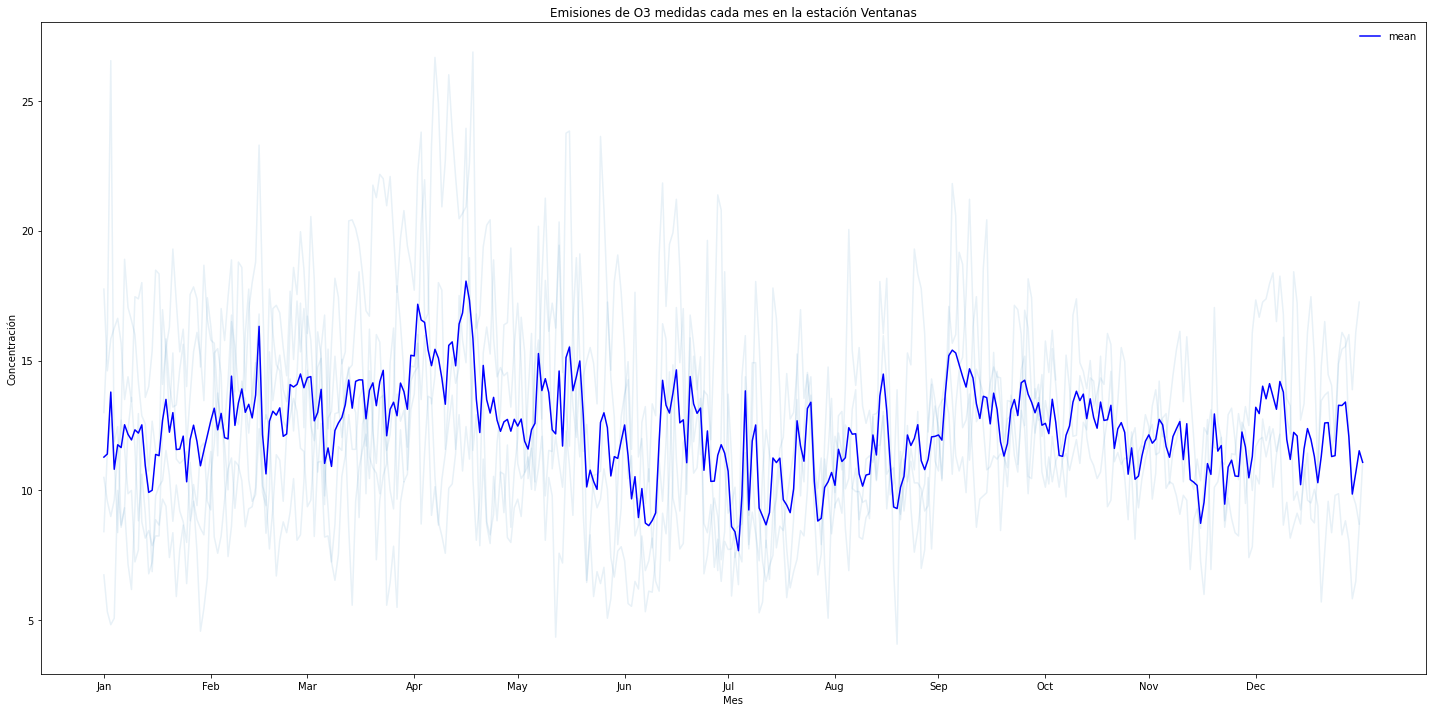

In [44]:
visualizar_trends(df_2anos, col = "O3", ano_0=2019)

In [45]:
import statsmodels.tsa.seasonal as Seasonal

In [46]:
STL = Seasonal.STL

In [47]:
dataso = ver_ultima_semana(ventanas_df).rename(columns={"Registros no validados_SO2": "SO2", "Registros no validados_NO2": "NO2", "Registros no validados_NO": "NO", "Registros no validados_NOX": "NOX", "Registros no validados_O3": "O3", "Registros no validados_CO": "CO"})

ValueError: Invalid fill method. Expecting pad (ffill) or backfill (bfill). Got linear

In [ ]:
dataso["day"] = dataso.index.day
dataso["month"] = dataso.index.month
dataso.groupby(["day", "month"]).mean()

In [ ]:
res = STL(dataso["SO2"]).fit()
res.plot()
plt.show()

# EDA Medium

In [48]:
ventanas_df = ventanas_df.rename(columns={"Registros no validados_SO2": "SO2", "Registros no validados_NO2": "NO2", "Registros no validados_NO": "NO", "Registros no validados_NOX": "NOX", "Registros no validados_O3": "O3", "Registros no validados_CO": "CO"})
ventanas_df

SO2   NO2       NO      NOX    O3               Fecha
2017-10-04 18:00:00  2.31  4.54  2.05393  6.50358  15.0 2017-10-04 18:00:00
2017-10-04 19:00:00  2.12  3.65  1.63730  5.28568  16.0 2017-10-04 19:00:00
2017-10-04 20:00:00  2.15  3.59  1.64193  5.22860  17.0 2017-10-04 20:00:00
2017-10-04 21:00:00  2.01  3.40  1.67473  5.07702  16.0 2017-10-04 21:00:00
2017-10-04 22:00:00  2.11  3.40  1.62698  5.02203  16.0 2017-10-04 22:00:00
...                   ...   ...      ...      ...   ...                 ...
2022-10-04 19:00:00  1.46  2.99  1.86067  4.85557  14.0 2022-10-04 19:00:00
2022-10-04 20:00:00  1.47  3.73  1.43493  5.16561  13.0 2022-10-04 20:00:00
2022-10-04 21:00:00  1.43  4.40  1.50767  5.90353  10.0 2022-10-04 21:00:00
2022-10-04 22:00:00  1.42  4.23  1.53685  5.76197  10.0 2022-10-04 22:00:00
2022-10-04 23:00:00  1.33  5.25  1.37245  6.61893   9.0 2022-10-04 23:00:00

[43830 rows x 6 columns]

In [49]:
ventanas_ma_df = get_minma_data(['velviento', 'temp', 'dirviento00'], 'concon', from_last=from_last, n_cols = 3)
ventanas_ma_df = ventanas_ma_df.rename(columns={"Unnamed: 2_velviento": "VelViento", "Unnamed: 2_temp": "Temperatura", "Unnamed: 2_dirviento00": "DirViento"})
ventanas_ma_df.head()

C:\Users\javie\AppData\Local\Temp/ipykernel_7368/445757985.py:1: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version
  ventanas_ma_df = get_minma_data(['velviento', 'temp', 'dirviento00'], 'concon', from_last=from_last, n_cols = 3)


VelViento  Temperatura  DirViento
2017-09-28 18:00:00   0.701297      12.9519    307.335
2017-09-28 19:00:00   0.189222      12.8652    341.265
2017-09-28 20:00:00   0.713454      12.6152    268.001
2017-09-28 21:00:00   0.835072      12.6785    248.214
2017-09-28 22:00:00   0.205688      12.8185    215.089

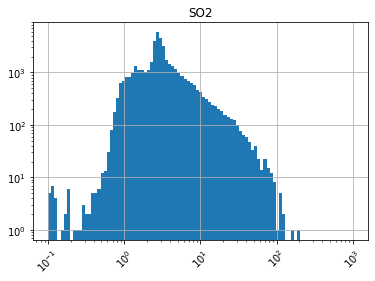

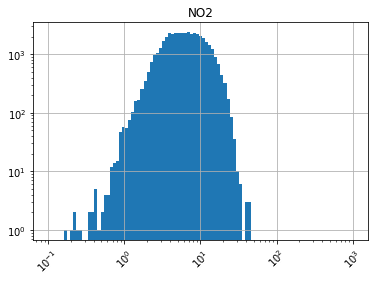

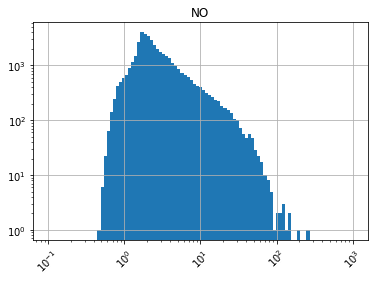

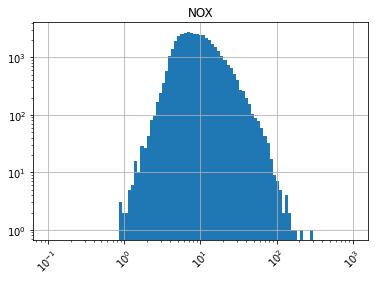

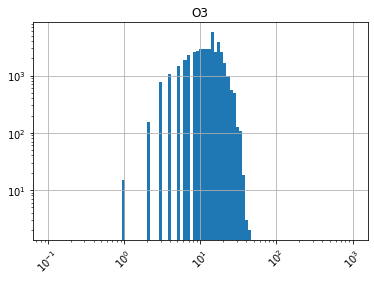

In [50]:
for col in ['SO2','NO2','NO','NOX', 'O3']:
    ventanas_df.hist(col, bins = np.logspace(-1,3,100), log =True)
    #sns.countplot(concon_df[col])
    plt.title(col)
    plt.xscale("log")
    plt.xticks(rotation=45)
    plt.show()

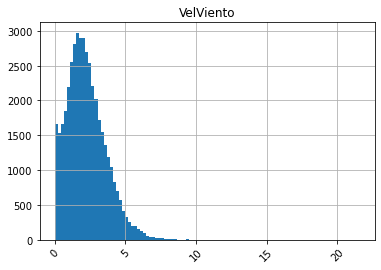

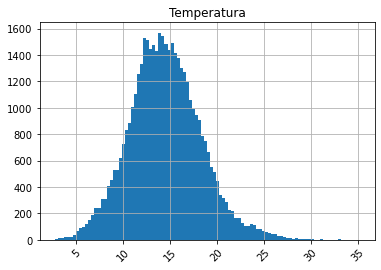

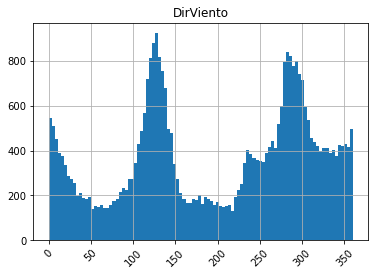

In [51]:
for col in ['VelViento','Temperatura','DirViento']:
    ventanas_ma_df.hist(col, bins = 100)
    #sns.countplot(concon_df[col])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

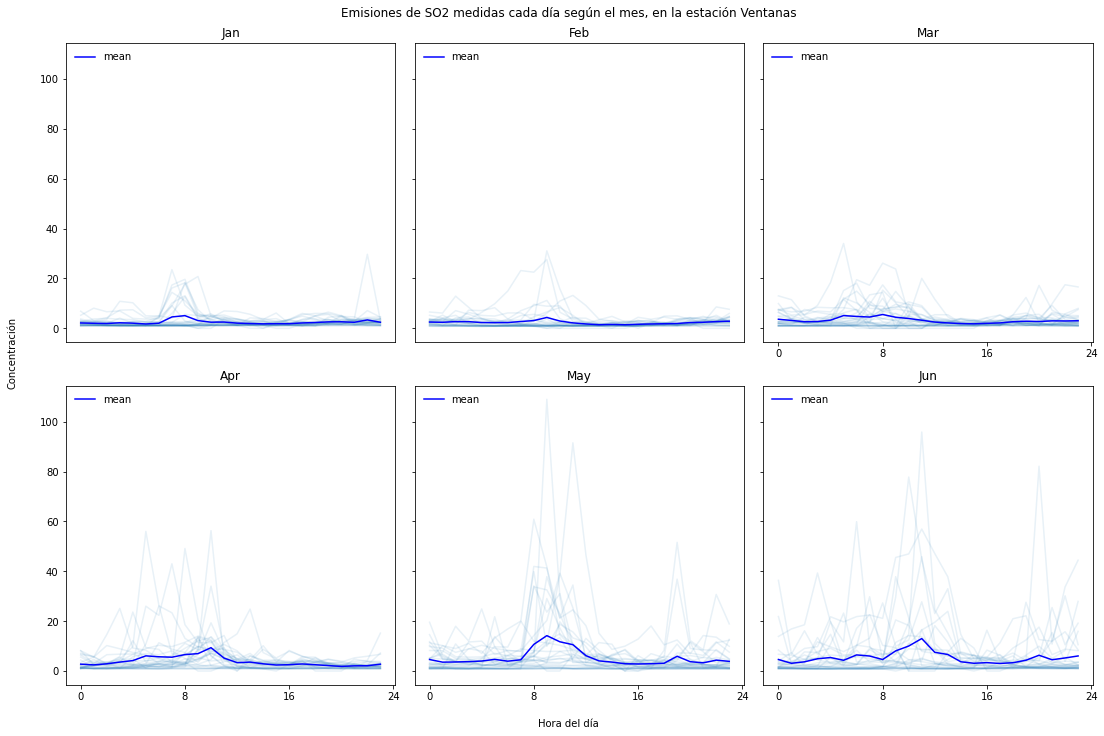

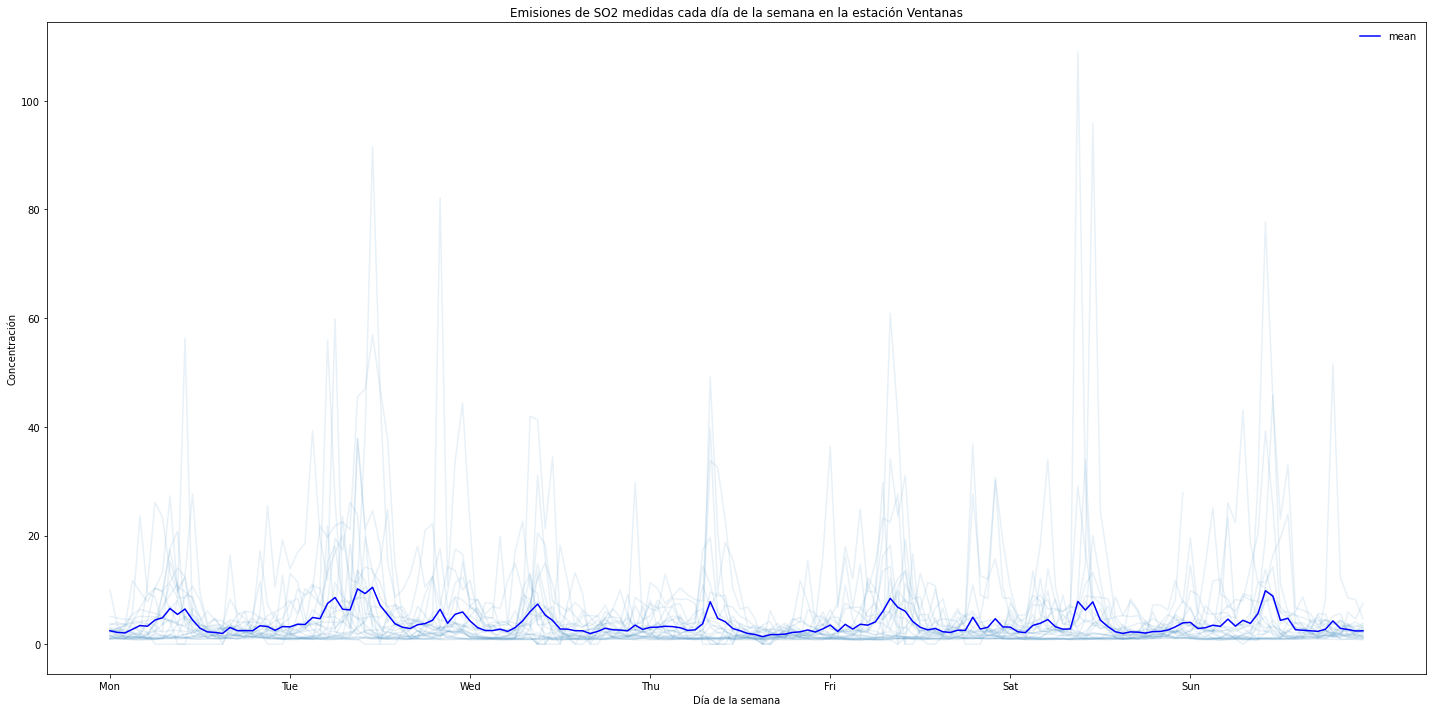

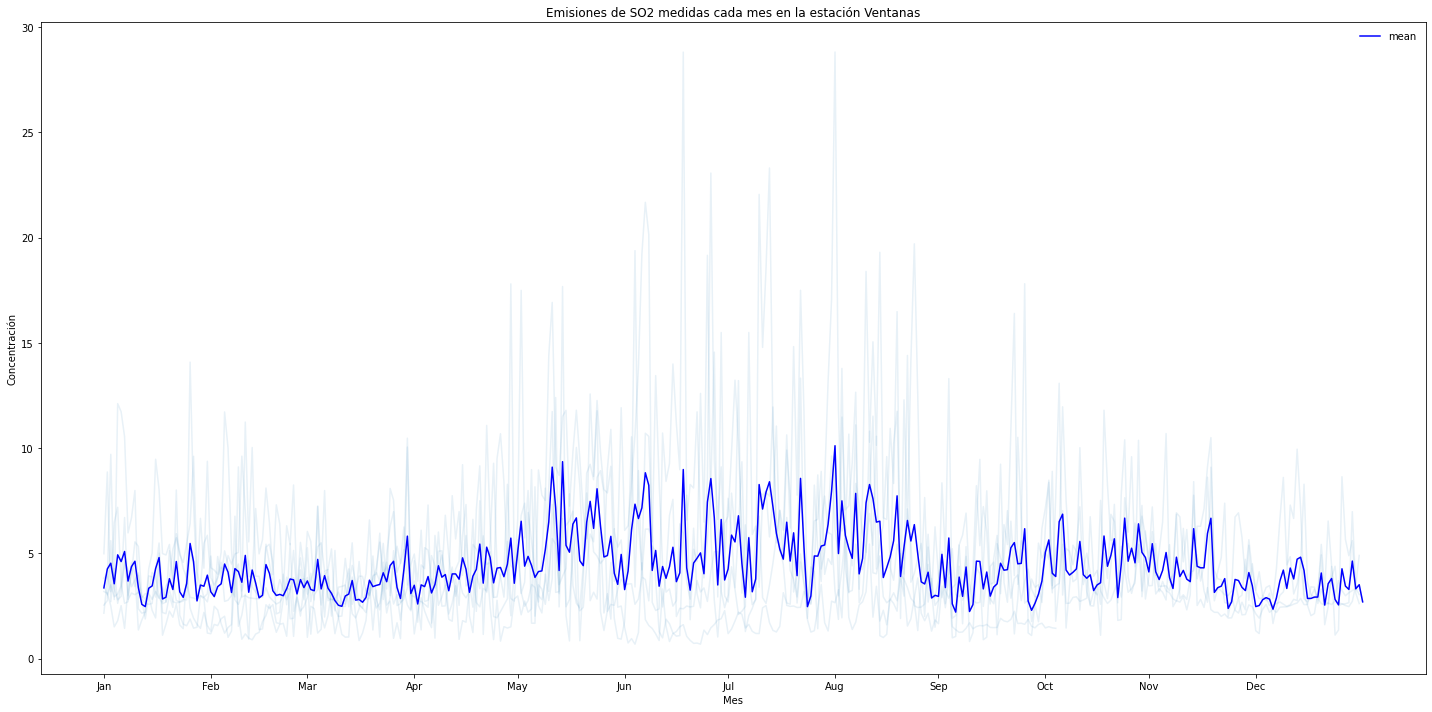

In [52]:
visualizar_trends(ventanas_df, col = "SO2", ano_0=2019, log =False)

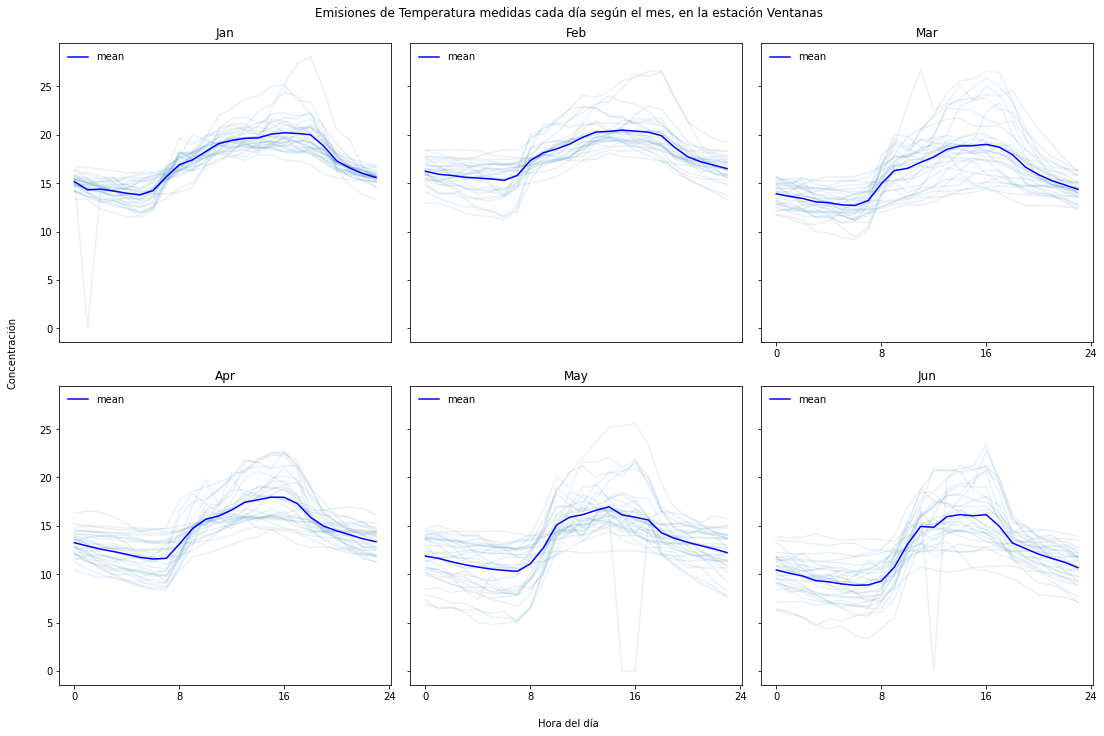

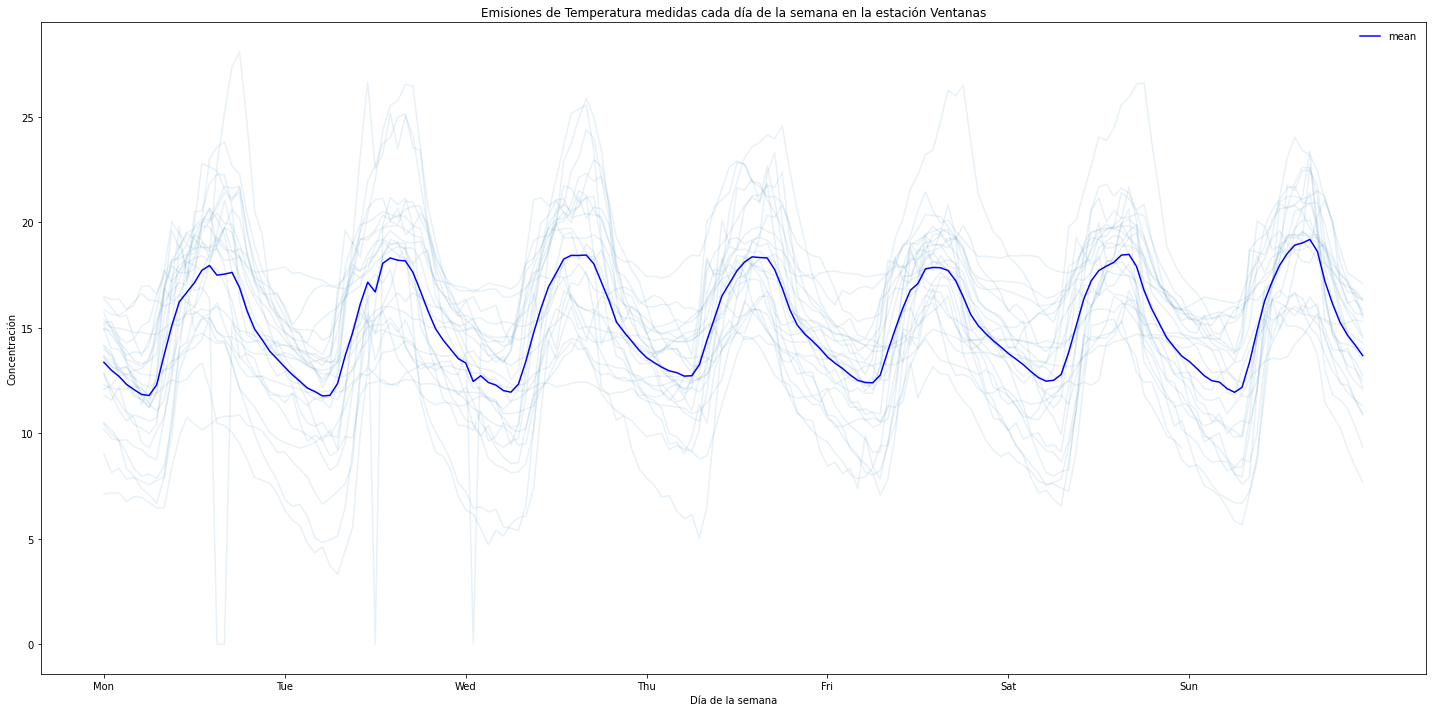

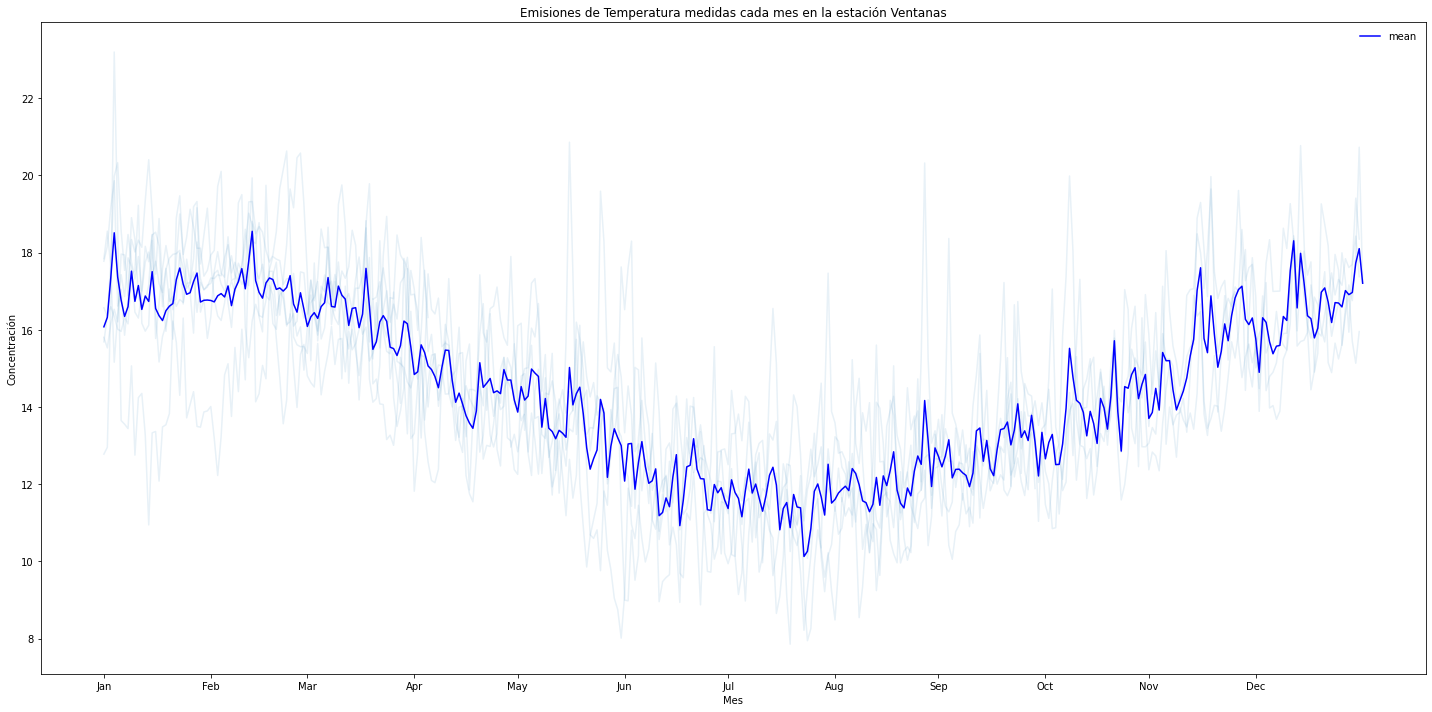

In [53]:
visualizar_trends(ventanas_ma_df, col = "Temperatura", ano_0=2019)

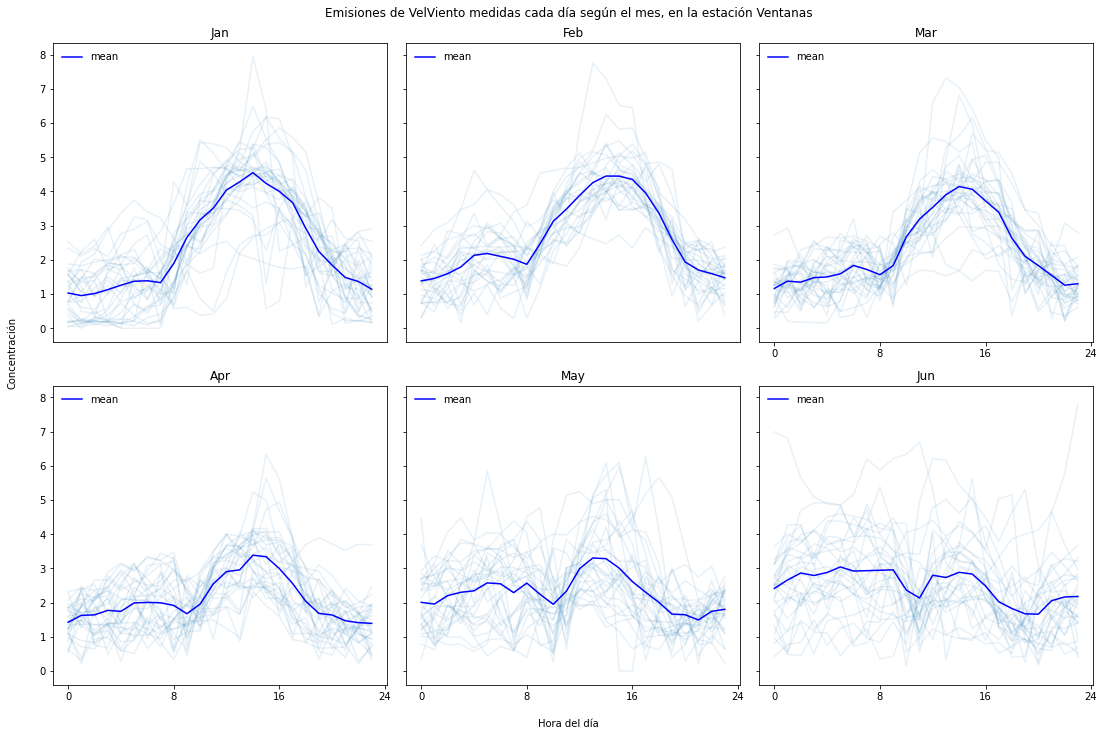

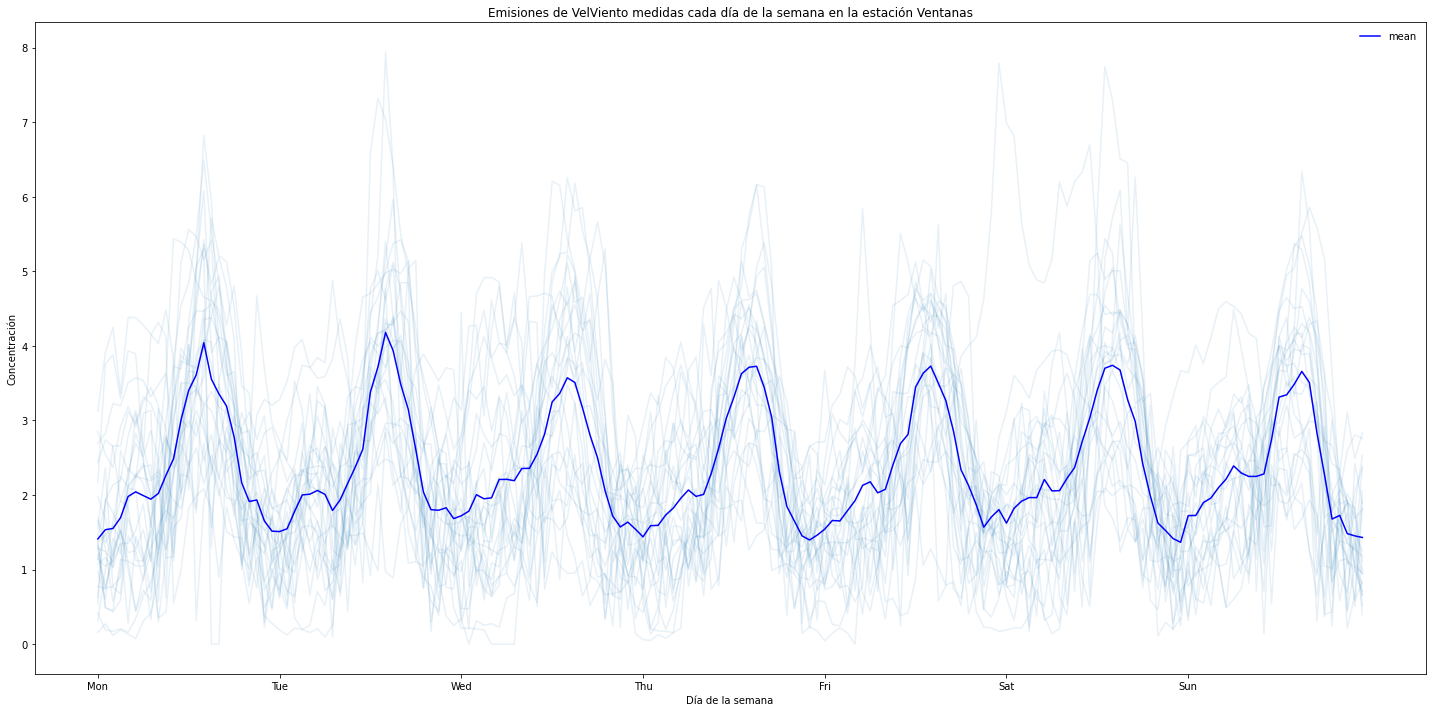

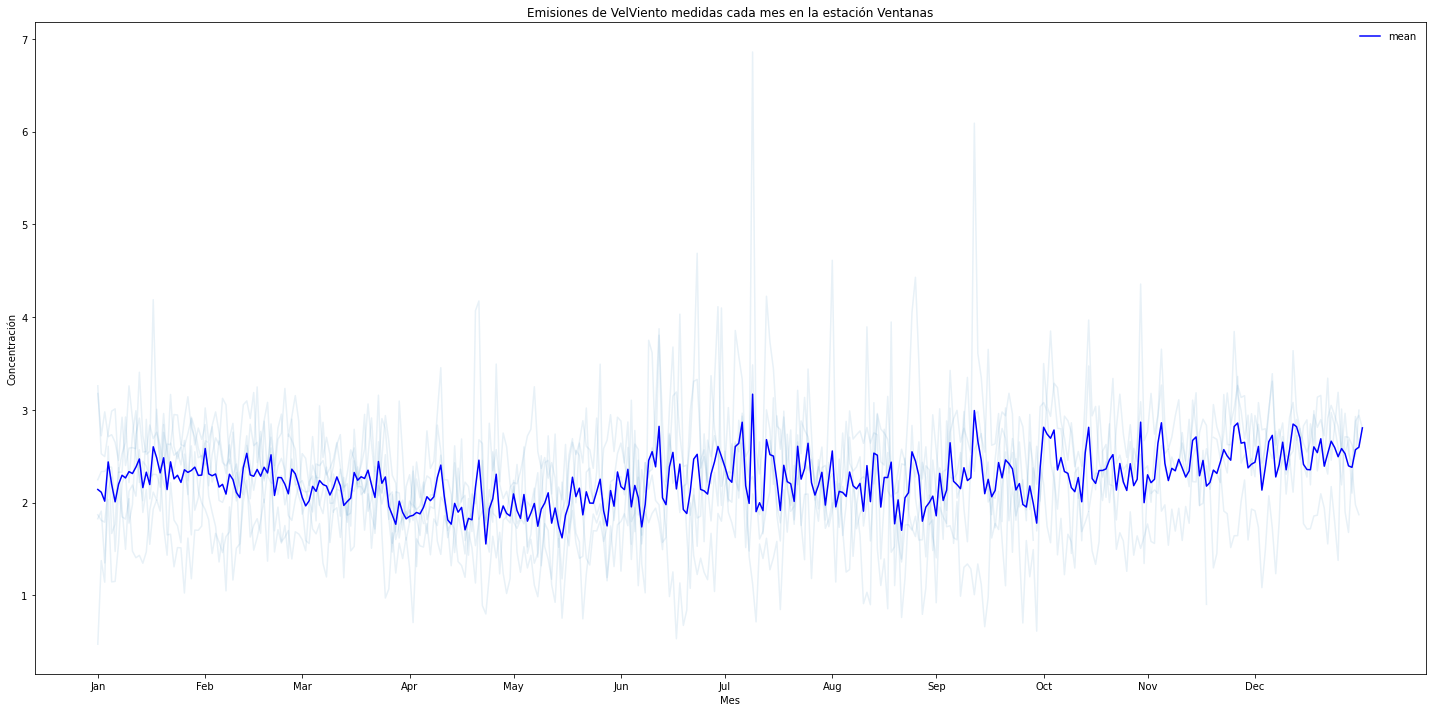

In [54]:
visualizar_trends(ventanas_ma_df, col = "VelViento", ano_0=2019)

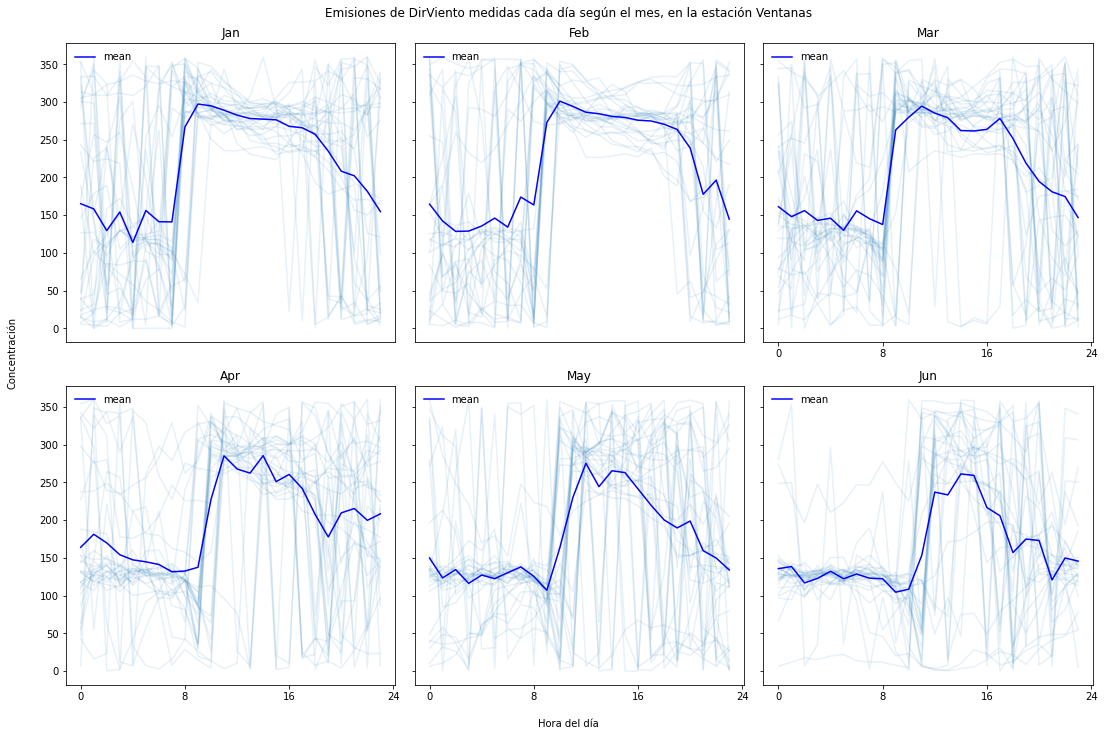

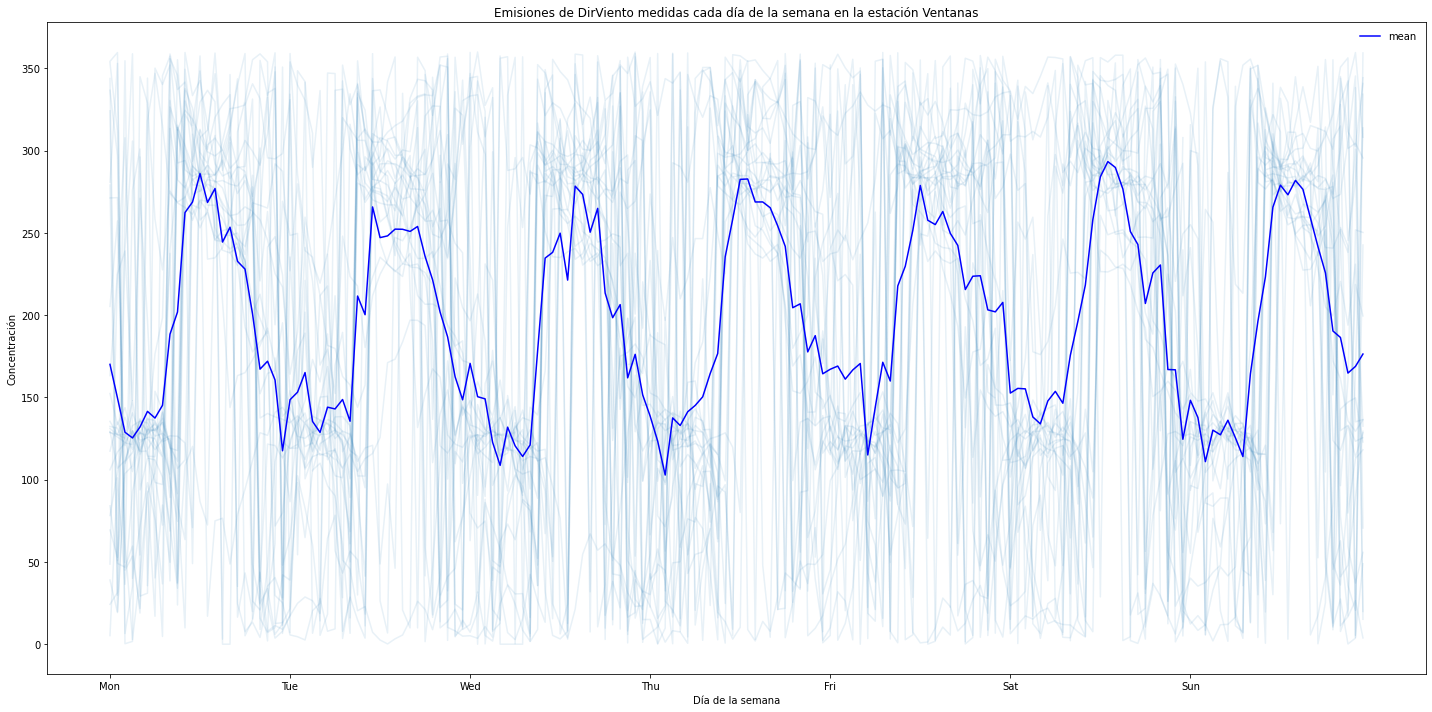

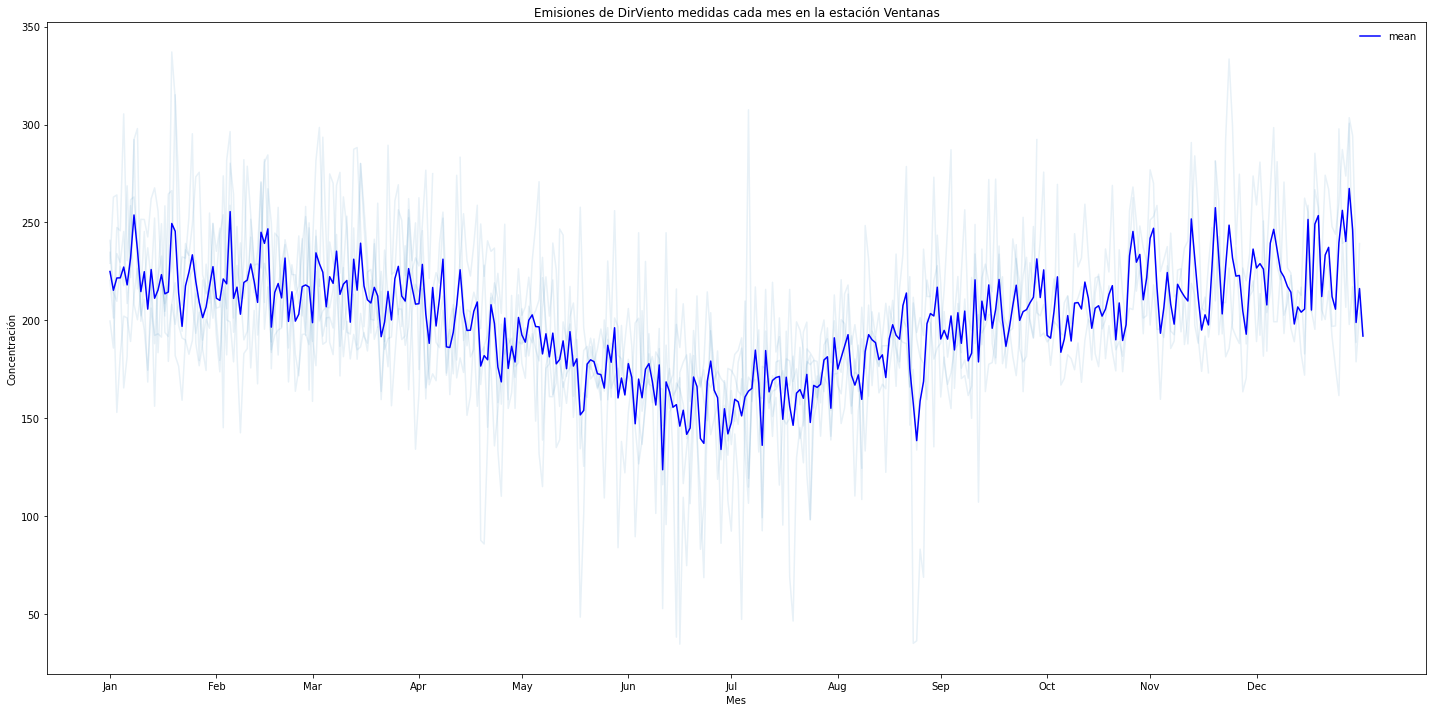

In [55]:
visualizar_trends(ventanas_ma_df, col = "DirViento", ano_0=2019, circular = False)

In [56]:
aaa = concon_ma_df.iloc[-100:]
aaa['rad'] = aaa.apply(lambda row: row.DirViento*np.pi/180, axis=1)
plt.polar(aaa['rad'], range(len(aaa.values))) #aaa["VelViento"])
#concon_ma_df


NameError: name 'concon_ma_df' is not defined

In [182]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
trace1 = px.line_polar(theta=aaa["DirViento"], r=range(len(aaa.values)))
trace2 = px.scatter_polar(theta=aaa["DirViento"], r=range(len(aaa.values)), color=range(len(aaa.values)), color_continuous_scale='hot')

fig.add_trace(trace1.data[0])
fig.add_trace(trace2.data[0])

#fig = px.scatter_polar(df, r="frequency", theta="direction")
fig.show()

In [188]:
concon_ma_df["VelViento"].apply(lambda x: np.mean(x), axis = 1)

TypeError: <lambda>() got an unexpected keyword argument 'axis'

## Ventanas

In [79]:
timeseries = ventanas_df
timeseries["week"] = timeseries.index.isocalendar().week
timeseries["day_of_month"] = timeseries.index.day
timeseries["month"] = timeseries.index.month
timeseries["year"] = timeseries.index.year

In [219]:
ano_elegido = 2022
days = []
for mes in range(12):
    for x in timeseries[["SO2", "day_of_month", "month", "year"]].query("month == {} and year == {}". format(mes+1, ano_elegido)).groupby("day_of_month"):
        #print(x[1])
        days.append(x[1]["SO2"].interpolate().fillna(0))
        #print(np.mean(x[1]["SO2"].interpolate()), np.max(x[1]["SO2"].interpolate()))
print(len(days))

277


In [249]:
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

from tslearn.clustering import TimeSeriesKMeans, KShape, KernelKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

In [221]:
X_train = days
seed = 0
print(X_train)
fechas = dict([((s.index.day.max(), s.index.month.max(), s.index.year.max()), i) for i, s in enumerate(X_train)])
print(fechas)

[2022-01-01 00:00:00    12.02
2022-01-01 01:00:00     4.91
2022-01-01 02:00:00     5.70
2022-01-01 03:00:00     3.55
2022-01-01 04:00:00     5.26
2022-01-01 05:00:00     7.98
2022-01-01 06:00:00     9.96
2022-01-01 07:00:00    12.83
2022-01-01 08:00:00     9.28
2022-01-01 09:00:00     5.34
2022-01-01 10:00:00     3.24
2022-01-01 11:00:00     3.35
2022-01-01 12:00:00     3.12
2022-01-01 13:00:00     2.94
2022-01-01 14:00:00     2.95
2022-01-01 15:00:00     2.76
2022-01-01 16:00:00     2.87
2022-01-01 17:00:00     2.96
2022-01-01 18:00:00     2.97
2022-01-01 19:00:00     2.97
2022-01-01 20:00:00     3.15
2022-01-01 21:00:00     3.08
2022-01-01 22:00:00     3.12
2022-01-01 23:00:00     3.36
Name: SO2, dtype: float64, 2022-01-02 00:00:00     3.49
2022-01-02 01:00:00     7.70
2022-01-02 02:00:00     3.59
2022-01-02 03:00:00     3.29
2022-01-02 04:00:00     4.19
2022-01-02 05:00:00     6.49
2022-01-02 06:00:00     4.24
2022-01-02 07:00:00    54.32
2022-01-02 08:00:00    65.63
2022-01-02 09:0

In [302]:
def plot_clusters(X_train, y_pred, N_clusters, clustering_name, estimator):
    fig, ax =  plt.subplots(N_clusters, figsize = (12, N_clusters))
    for yi in range(N_clusters):
        booleano = y_pred == yi
        for i, xx in enumerate(X_train):
            if booleano[i]:
                sns.lineplot(x = range(24), y = xx.ravel(), color = "k", ax = ax[yi], alpha=.2)
        if clustering_name != "GAK KMeans":
            sns.lineplot(x = range(24), y = estimator.cluster_centers_[yi].ravel(), color = "r", ax = ax[yi], label = "Cluster {}".format(yi))
        ax[yi].set_xlim(0,24)
    ax[0].set(title=clustering_name)
    plt.legend(loc = "upper right")
    plt.tight_layout()
    plt.show()
    
def test_clusterings(X_train, N_clusters, method = "Euclidean KMeans"):
    if method == "Euclidean KMeans":
        estimator = TimeSeriesKMeans(n_clusters= N_clusters, verbose=True, random_state=seed)
    elif method ==  "Soft-DTW KMeans": 
        estimator = TimeSeriesKMeans(n_clusters= N_clusters,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
    elif method == "DBA KMeans":
        estimator = TimeSeriesKMeans(n_clusters = N_clusters,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=seed)
    elif method == "KShape":
        estimator = KShape(n_clusters= N_clusters, n_init=1, random_state=seed)
    elif method == "GAK KMeans":
        estimator = KernelKMeans(n_clusters=N_clusters, kernel="gak", random_state=seed)
    print(method)
    y_pred = estimator.fit_predict(X_train)
    plot_clusters(X_train, y_pred, N_clusters, method, estimator)
    return y_pred, estimator

Soft-DTW KMeans
39871.847 --> 16755.519 --> 16636.731 --> 16832.813 --> 16599.306 --> 16496.154 --> 16500.223 --> 16491.186 --> 16486.347 --> 16489.726 --> 16487.415 --> 16488.858 --> 16487.815 --> 16488.809 --> 16488.274 --> 16488.054 --> 16488.308 --> 16488.193 --> 16488.121 --> 16488.185 --> 16488.186 --> 16488.183 --> 16488.178 --> 16488.182 --> 16488.180 --> 16488.182 --> 16488.180 --> 16488.182 --> 16488.181 --> 16488.182 --> 16488.181 --> 16488.182 --> 16488.181 --> 16488.181 --> 16488.181 --> 16488.181 --> 16488.181 --> 16488.181 --> 16488.181 --> 16488.181 --> 16488.181 --> 16488.181 --> 16488.181 --> 16488.181 --> 16488.181 --> 16488.181 --> 16488.181 --> 16488.181 --> 16488.181 --> 16488.181 --> 


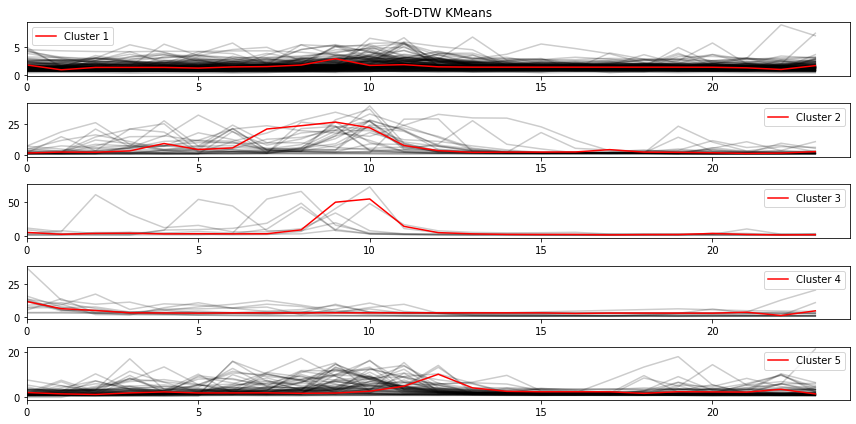

array([3, 2, 0, 3, 0, 4, 3, 3, 4, 4, 3, 0, 0, 4, 0, 0, 1, 0, 0, 4, 0, 2,
       0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 0, 0,
       0, 0, 4, 4, 3, 0, 0, 0, 4, 0, 1, 0, 4, 2, 2, 0, 4, 4, 0, 0, 1, 1,
       0, 3, 0, 0, 0, 0, 3, 4, 0, 0, 0, 4, 0, 3, 0, 1, 4, 1, 0, 0, 0, 1,
       2, 4, 0, 4, 4, 4, 0, 0, 1, 1, 3, 1, 0, 4, 4, 0, 4, 0, 4, 1, 4, 1,
       0, 1, 4, 0, 1, 0, 0, 0, 0, 4, 1, 4, 4, 3, 4, 1, 4, 0, 1, 4, 4, 1,
       0, 1, 4, 1, 3, 1, 0, 4, 2, 4, 4, 0, 1, 4, 4, 0, 1, 4, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4,
       0, 0, 2, 4, 4, 4, 0, 0, 0, 0, 4, 0, 0, 4, 0, 4, 0, 1, 0, 0, 0, 4,
       0, 4, 1, 4, 4, 0, 4, 0, 4, 4, 0, 1, 4, 0, 0, 4, 4, 0, 0, 4, 0, 0,
       0, 4, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [258]:
N_clusters = 5
test_clusterings(X_train, N_clusters, "Soft-DTW KMeans")

Euclidean KMeans
237.201 --> 160.782 --> 156.032 --> 153.685 --> 153.342 --> 153.316 --> 153.316 --> 


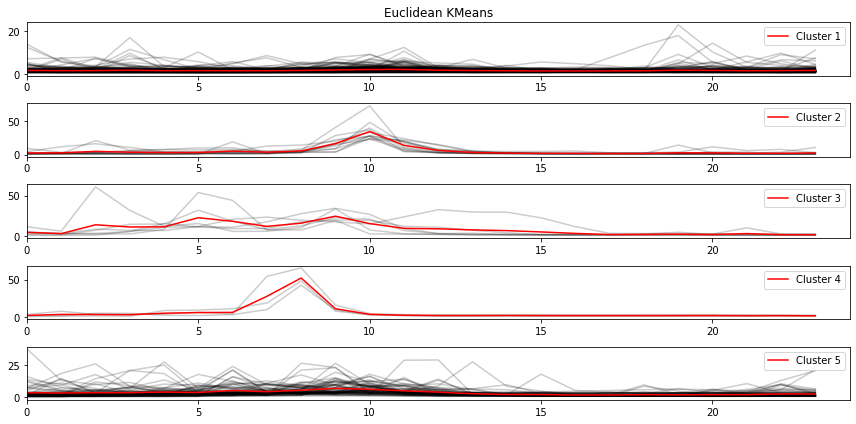

array([4, 3, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 0, 4, 0, 0, 4, 0, 2,
       0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 3, 3, 0, 4, 0, 0, 0, 4, 4,
       0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 4, 0, 0, 0, 1,
       2, 4, 0, 0, 4, 4, 0, 0, 1, 4, 4, 1, 0, 4, 4, 0, 0, 0, 0, 1, 0, 2,
       0, 1, 4, 0, 4, 0, 0, 0, 0, 4, 1, 0, 4, 0, 0, 2, 4, 0, 4, 4, 4, 2,
       4, 2, 0, 0, 4, 4, 0, 4, 1, 0, 4, 4, 1, 0, 4, 0, 1, 4, 4, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       0, 0, 1, 4, 4, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0,
       4, 4, 4, 0, 4, 0, 0, 0, 4, 0, 0, 1, 4, 0, 0, 4, 4, 0, 0, 0, 0, 0,
       0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [259]:
# Euclidean k-means
test_clusterings(X_train, N_clusters, "Euclidean KMeans")

DBA KMeans
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 277 out of 277 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 831 out of 831 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 831 out of 831 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 831 out of 831 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 831 out of 831 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1385 out of 1385 | elapsed:    0.1s finished


75.193 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1385 out of 1385 | elapsed:    0.0s finished


52.804 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1385 out of 1385 | elapsed:    0.0s finished


51.664 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1385 out of 1385 | elapsed:    0.0s finished


51.041 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1385 out of 1385 | elapsed:    0.1s finished


50.963 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1385 out of 1385 | elapsed:    0.0s finished


50.948 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1385 out of 1385 | elapsed:    0.0s finished


50.946 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1385 out of 1385 | elapsed:    0.1s finished


50.946 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 277 out of 277 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 831 out of 831 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 831 out of 831 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 831 out of 831 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 831 out of 831 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1385 out of 1385 | elapsed:    0.1s finished


78.181 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1385 out of 1385 | elapsed:    0.1s finished


53.983 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1385 out of 1385 | elapsed:    0.0s finished


53.521 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1385 out of 1385 | elapsed:    0.0s finished


53.341 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1385 out of 1385 | elapsed:    0.0s finished


53.323 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1385 out of 1385 | elapsed:    0.1s finished


53.319 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1385 out of 1385 | elapsed:    0.1s finished


53.319 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1385 out of 1385 | elapsed:    0.0s finished


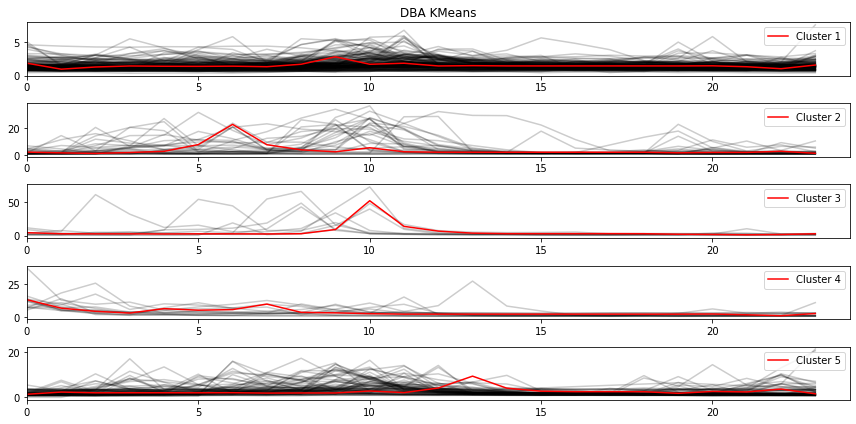

array([3, 2, 0, 3, 0, 4, 4, 3, 4, 4, 4, 0, 0, 4, 0, 0, 1, 0, 0, 4, 0, 2,
       0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 0, 0,
       0, 0, 4, 4, 3, 0, 0, 0, 4, 0, 1, 0, 4, 2, 2, 0, 4, 4, 0, 0, 1, 1,
       0, 3, 0, 0, 0, 0, 3, 4, 0, 0, 0, 4, 0, 3, 0, 1, 4, 1, 0, 0, 0, 1,
       2, 4, 0, 4, 4, 4, 0, 0, 1, 1, 3, 1, 0, 4, 4, 0, 4, 0, 1, 1, 4, 1,
       0, 1, 4, 0, 1, 0, 0, 0, 0, 4, 1, 4, 4, 3, 4, 1, 4, 4, 1, 4, 4, 1,
       0, 1, 4, 1, 3, 3, 0, 4, 2, 4, 4, 4, 1, 4, 4, 0, 1, 4, 0, 0, 0, 0,
       0, 0, 2, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 4,
       4, 0, 2, 4, 4, 4, 0, 0, 0, 0, 4, 0, 0, 4, 4, 3, 0, 1, 0, 0, 0, 4,
       4, 4, 1, 4, 1, 0, 4, 0, 4, 4, 0, 1, 4, 0, 0, 4, 4, 0, 0, 4, 0, 0,
       0, 4, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [260]:
# DBA-k-means
test_clusterings(X_train, N_clusters, "DBA KMeans")

KShape


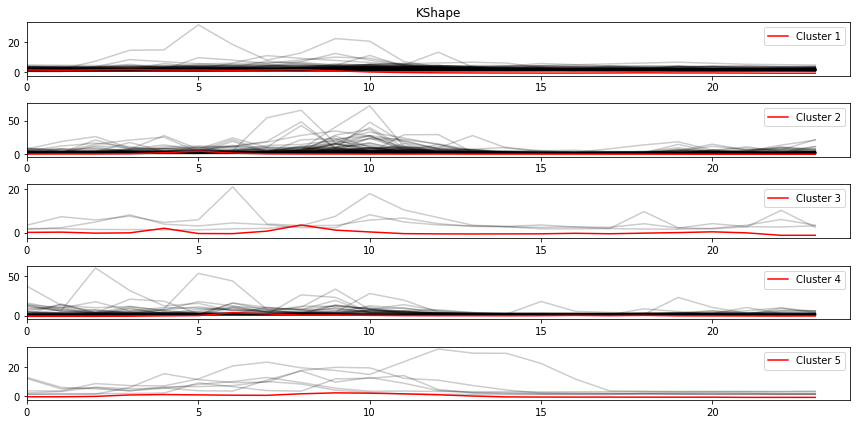

array([4, 1, 0, 3, 0, 0, 1, 3, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 3,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 3, 0, 0, 0, 0,
       1, 3, 3, 1, 1, 3, 0, 0, 1, 0, 3, 0, 1, 1, 1, 0, 3, 1, 0, 1, 1, 1,
       1, 3, 1, 0, 0, 1, 4, 1, 0, 0, 1, 4, 3, 3, 0, 3, 1, 1, 0, 1, 0, 1,
       3, 0, 0, 1, 0, 1, 0, 0, 1, 1, 3, 3, 1, 3, 3, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 3, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 0, 3, 4,
       0, 4, 1, 3, 3, 1, 0, 3, 1, 1, 1, 0, 1, 1, 3, 0, 1, 1, 0, 1, 0, 1,
       3, 1, 1, 1, 3, 3, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 1, 2,
       1, 0, 1, 0, 4, 2, 3, 0, 0, 1, 3, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 3,
       0, 1, 3, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 3,
       0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [261]:
test_clusterings(X_train, N_clusters, "KShape")

GAK KMeans


C:\Users\javie\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 277 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
No handles with labels found to put in legend.


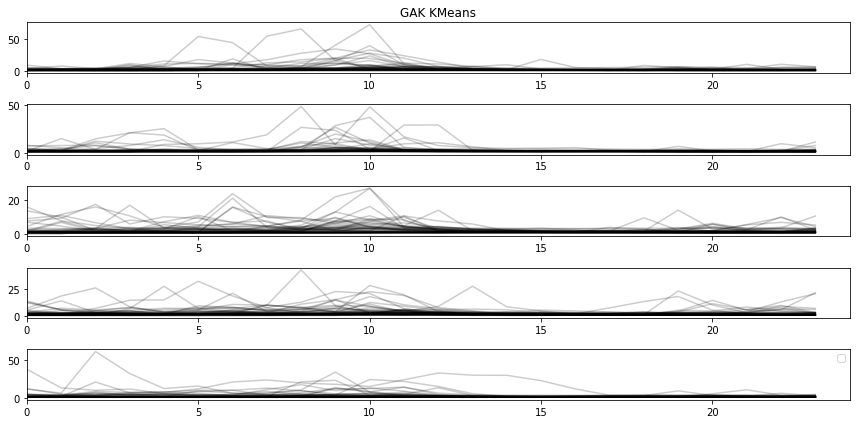

array([4, 0, 3, 3, 3, 1, 3, 2, 4, 0, 0, 4, 1, 1, 0, 1, 1, 0, 1, 4, 3, 0,
       3, 1, 1, 3, 4, 4, 3, 3, 4, 4, 1, 1, 1, 0, 2, 4, 3, 3, 2, 4, 2, 2,
       0, 4, 0, 4, 1, 4, 4, 2, 2, 0, 1, 2, 1, 1, 3, 2, 2, 3, 0, 3, 4, 1,
       2, 4, 3, 4, 2, 2, 3, 4, 2, 4, 0, 4, 3, 2, 2, 1, 1, 3, 2, 0, 2, 2,
       4, 2, 0, 3, 2, 2, 0, 1, 0, 2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 2, 3,
       4, 1, 2, 2, 1, 2, 1, 4, 2, 3, 0, 3, 2, 3, 0, 0, 0, 3, 2, 3, 0, 4,
       0, 0, 2, 3, 2, 3, 2, 0, 0, 3, 0, 2, 2, 0, 4, 3, 4, 0, 4, 3, 0, 4,
       1, 3, 0, 0, 0, 1, 0, 4, 1, 3, 2, 0, 0, 4, 3, 4, 2, 0, 0, 0, 2, 0,
       3, 1, 1, 1, 0, 4, 3, 2, 3, 2, 4, 1, 4, 4, 4, 0, 4, 2, 4, 4, 0, 2,
       3, 3, 1, 3, 4, 3, 3, 4, 4, 1, 3, 2, 4, 4, 3, 1, 2, 3, 1, 4, 2, 2,
       0, 1, 0, 4, 0, 3, 2, 1, 0, 1, 1, 0, 3, 4, 3, 0, 4, 4, 1, 1, 4, 4,
       1, 2, 1, 1, 1, 4, 4, 4, 4, 1, 4, 1, 1, 1, 1, 4, 4, 4, 1, 1, 1, 1,
       2, 1, 3, 1, 4, 1, 4, 1, 1, 4, 4, 4, 4], dtype=int64)

In [266]:
test_clusterings(X_train, N_clusters, "GAK KMeans")

## Ver dónde cae una cierta fecha

In [269]:
days = []
for ano_elegido in [2018, 2019, 2022]:
    for mes in range(12):
        for x in timeseries[["SO2", "day_of_month", "month", "year"]].query("month == {} and year == {}". format(mes+1, ano_elegido)).groupby("day_of_month"):
            #print(x[1])
            days.append(x[1]["SO2"].interpolate().fillna(0))
            #print(np.mean(x[1]["SO2"].interpolate()), np.max(x[1]["SO2"].interpolate()))
print(len(days))

1007


In [297]:
N_clusters = 11
fechas = dict([((s.index.day.max(), s.index.month.max(), s.index.year.max()), i) for i, s in enumerate(days)])
# Entrenamos sólo con los datos del 2018
X_train = days[:365]
# Pero evaluaremos en las fechas que consideramos interesantes
X_total = days
seed = 0
#print(fechas)

Euclidean KMeans
811.264 --> 669.034 --> 641.627 --> 635.627 --> 630.623 --> 627.939 --> 625.913 --> 623.798 --> 623.080 --> 622.187 --> 619.118 --> 618.261 --> 615.676 --> 615.095 --> 614.938 --> 614.938 --> 


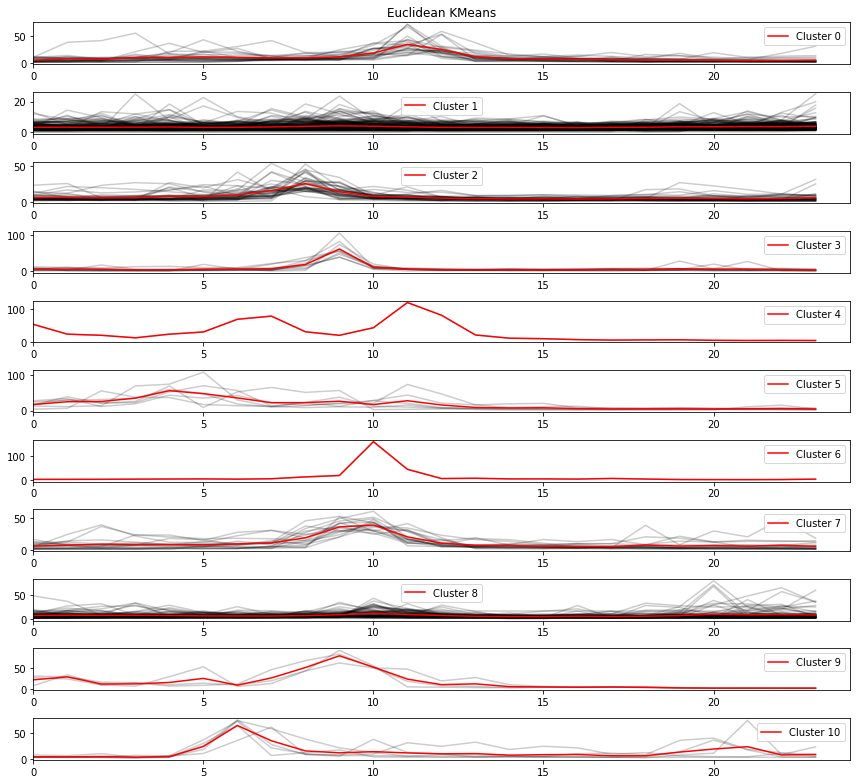

In [303]:
# Euclidean k-means
y_pred, km = test_clusterings(X_train, N_clusters, "Euclidean KMeans")

In [304]:
fechas_interesantes = [(19,8,2018), (1,10,2019), (6,6,2022)]
ts_dias = [X_total[fechas[f]] for f in fechas_interesantes]

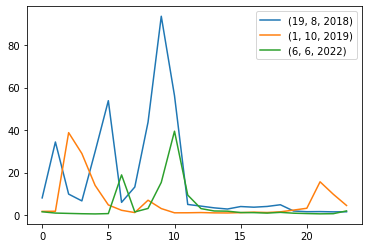

In [305]:
for i, s in enumerate(ts_dias):
    plt.plot(range(24), s, label = "{}".format(fechas_interesantes[i]))
plt.legend()
plt.show()

In [306]:
km.predict(ts_dias)

C:\Users\javie\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 3 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


array([9, 8, 8], dtype=int64)